# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [64]:
from sklearn.metrics import accuracy_score

In [66]:
# Libraries for tuning
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# **Upload Dataset**

In [3]:
df = pd.read_csv('/content/Uncleaned_Dataset.csv')

In [4]:
df.dropna(inplace=True)

In [5]:
df.columns

Index(['Player Name', 'Position', 'Club Name', 'Age', ' Weekly Salary ',
       'Matches Played', 'Minutes Played', 'Yellow Cards', 'Red Cards ',
       'Shots', 'Shots per 90', 'Tackles Made', 'Tackles Won',
       'Times Team Pressed Opposition', 'Blocks ', 'Interceptions',
       'Clearances', 'Fouls Commited', 'Fouls Drawn', 'Loose Balls Recovered',
       'Aerial Battles Won %', 'Goal Creation per 90',
       'Fully Completed Matches', 'Touches', 'Successful Dribbles',
       'Attempted Dribbles', 'Distance Ran', 'Distance Covered With Ball',
       'Times Dispossessed', 'Passes Received', 'Total Injuries',
       'Minor Injuries', 'Moderate Injuries', 'Serious Injuries', 'COVID-19'],
      dtype='object')

# **Convert All Factors to Per-90**

In [6]:
df['Full 90s Played'] = df['Minutes Played'] / 90

In [7]:
columns_to_convert = ['Yellow Cards', 'Red Cards ', 'Tackles Made', 'Tackles Won', 'Times Team Pressed Opposition',
                      'Blocks ', 'Interceptions', 'Clearances', 'Fouls Commited', 'Fouls Drawn', 'Loose Balls Recovered',
                      'Touches', 'Successful Dribbles', 'Attempted Dribbles', 'Distance Ran', 'Distance Covered With Ball',
                      'Times Dispossessed', 'Passes Received', 'Total Injuries', 'Minor Injuries', 'Moderate Injuries',
                      'Serious Injuries', 'COVID-19']



In [8]:
columns_to_select = ['Yellow Cards', 'Red Cards ', 'Tackles Made', 'Tackles Won', 'Times Team Pressed Opposition',
                      'Blocks ', 'Interceptions', 'Clearances', 'Fouls Commited', 'Fouls Drawn', 'Loose Balls Recovered',
                      'Touches', 'Successful Dribbles', 'Attempted Dribbles', 'Distance Ran', 'Distance Covered With Ball',
                      'Times Dispossessed', 'Passes Received']

In [9]:
# Convert columns to per 90
for column in columns_to_convert:
    df[column + ' per 90'] = df[column] / df['Full 90s Played']

# **Distributions**

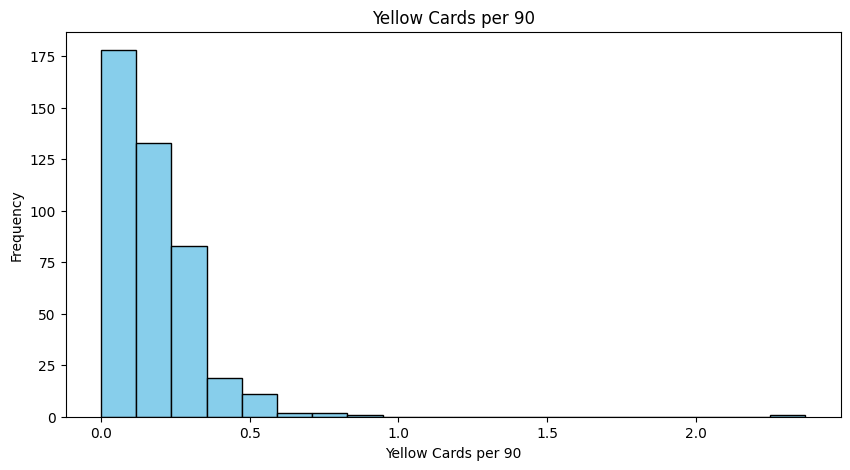

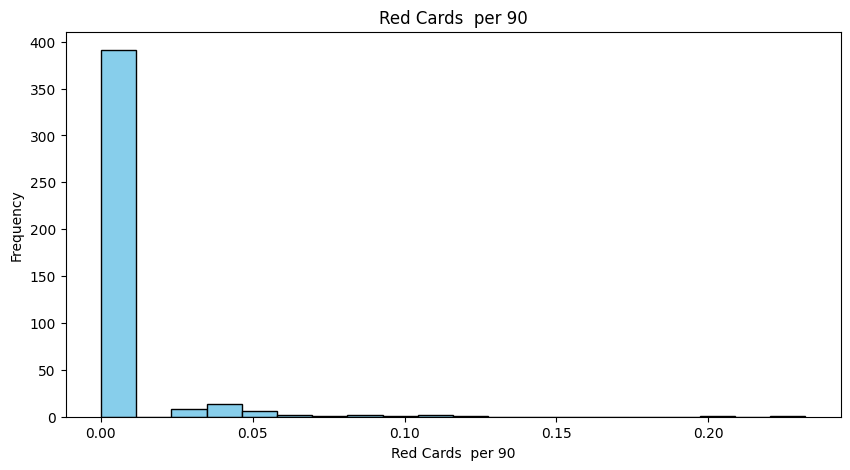

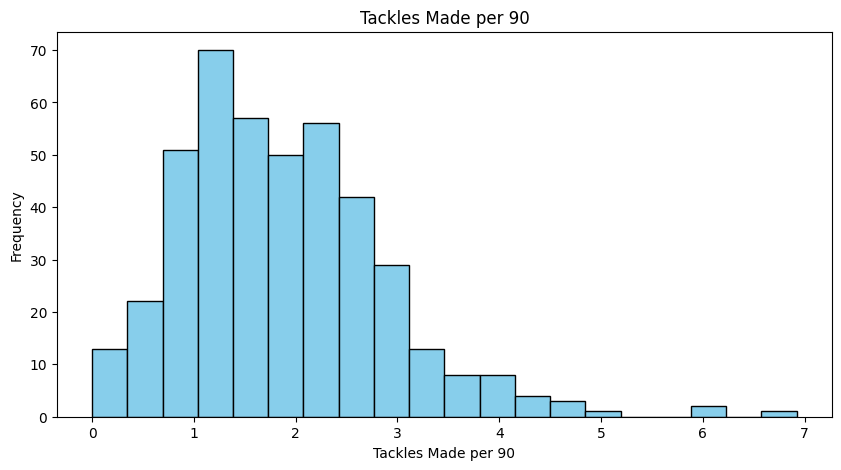

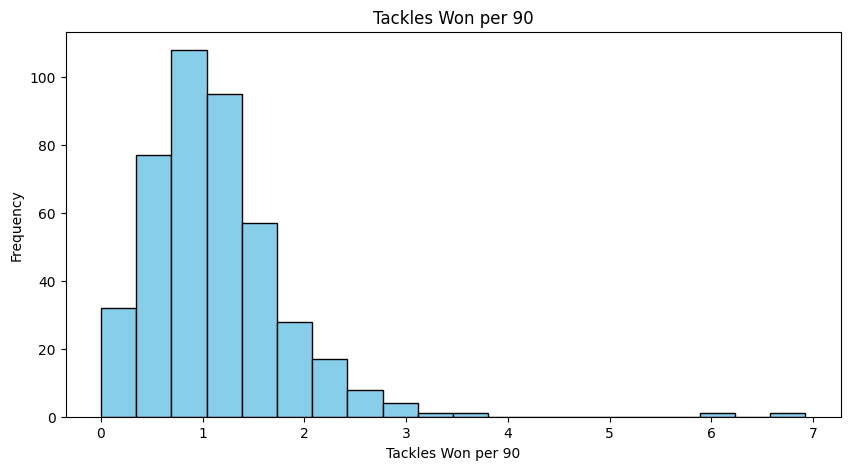

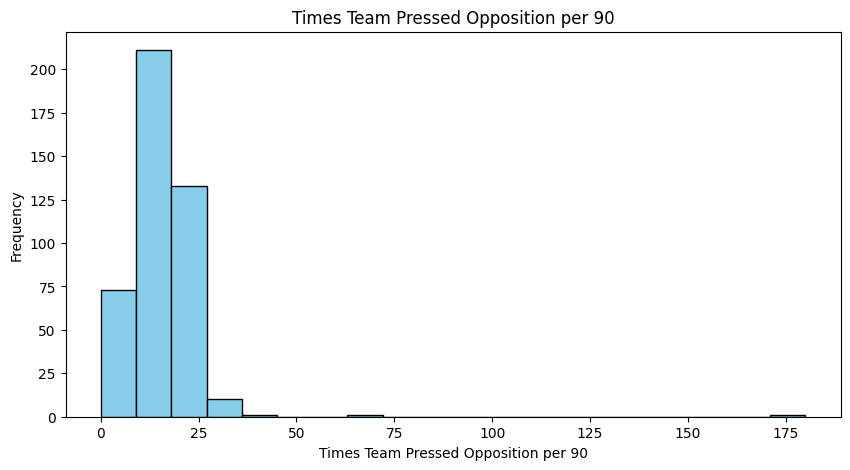

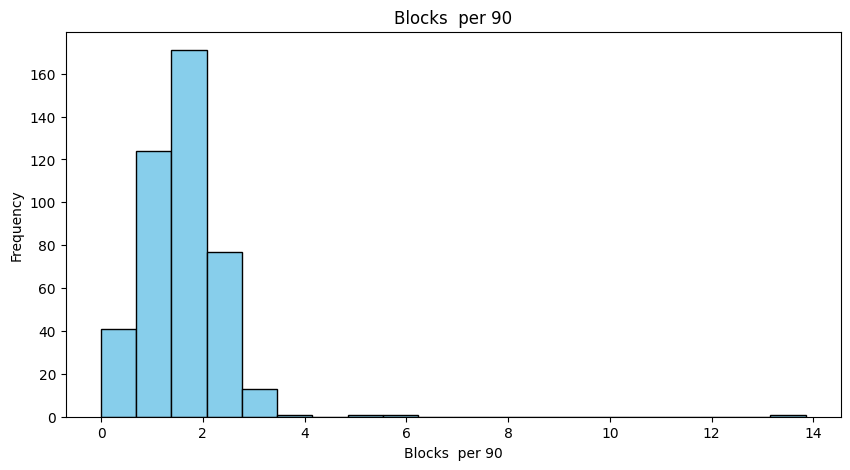

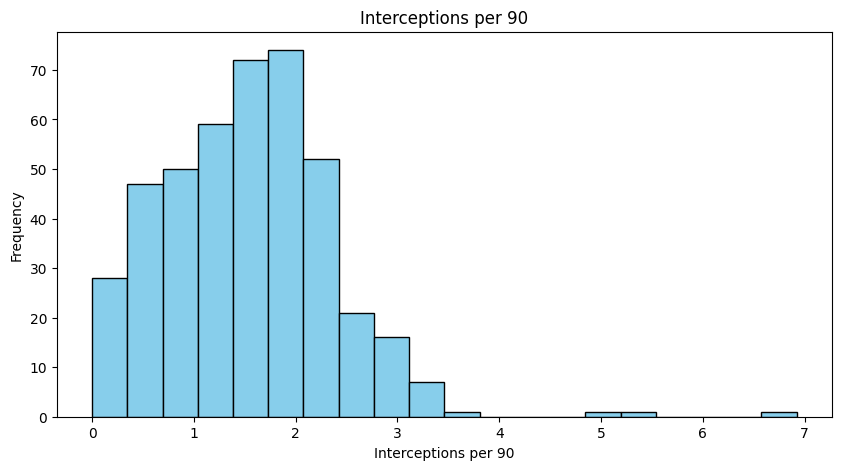

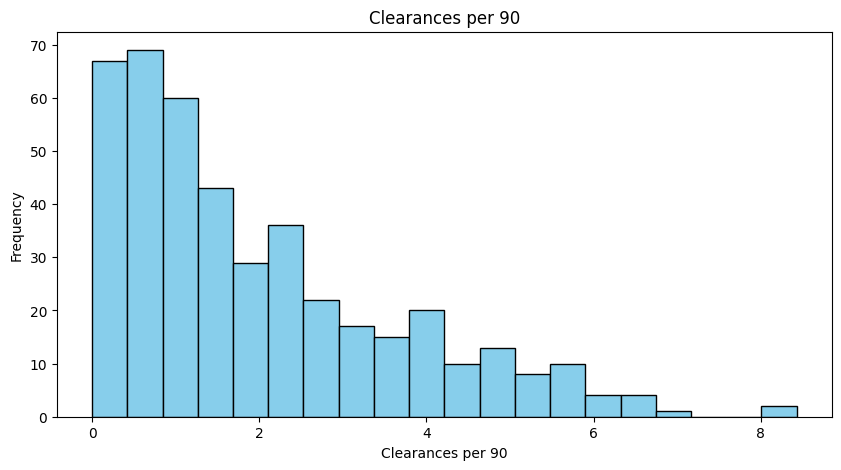

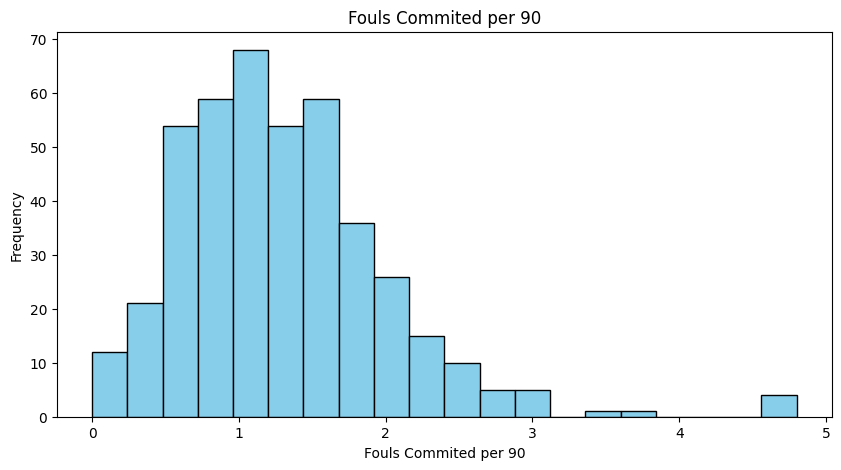

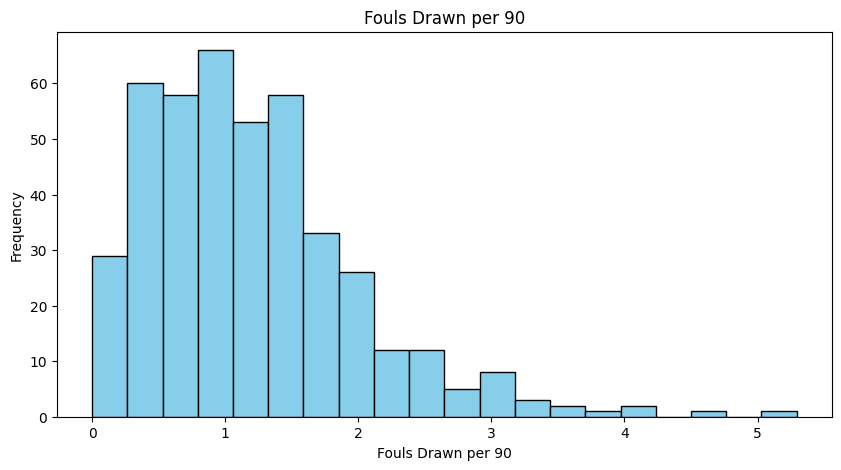

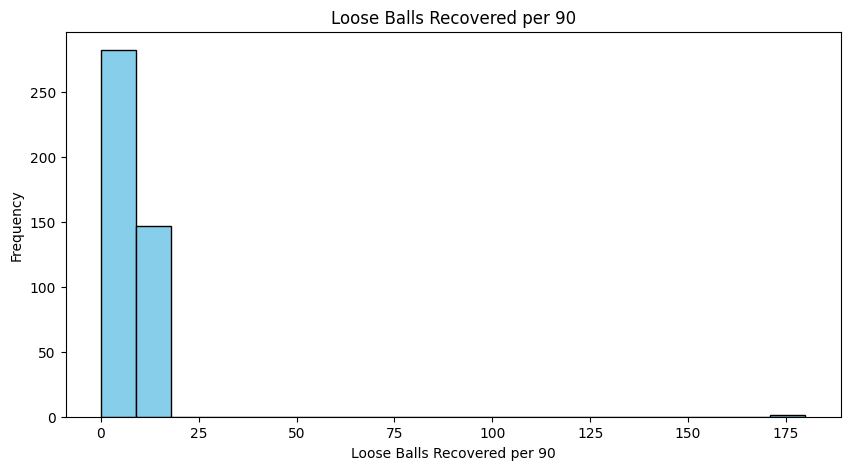

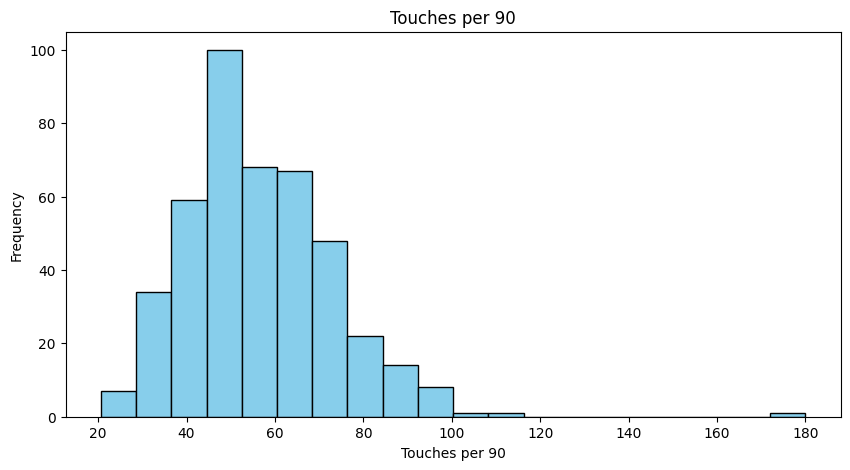

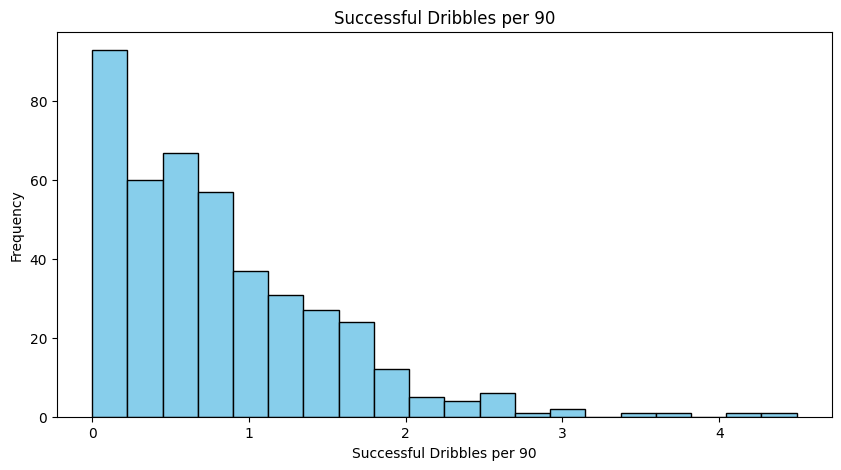

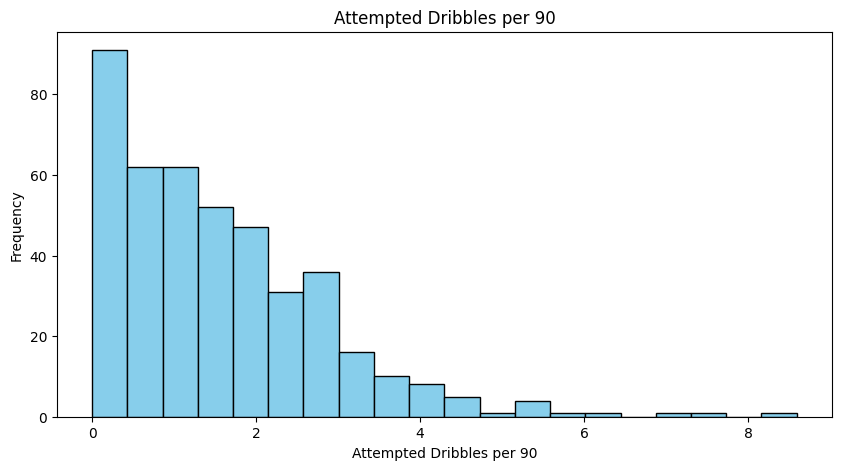

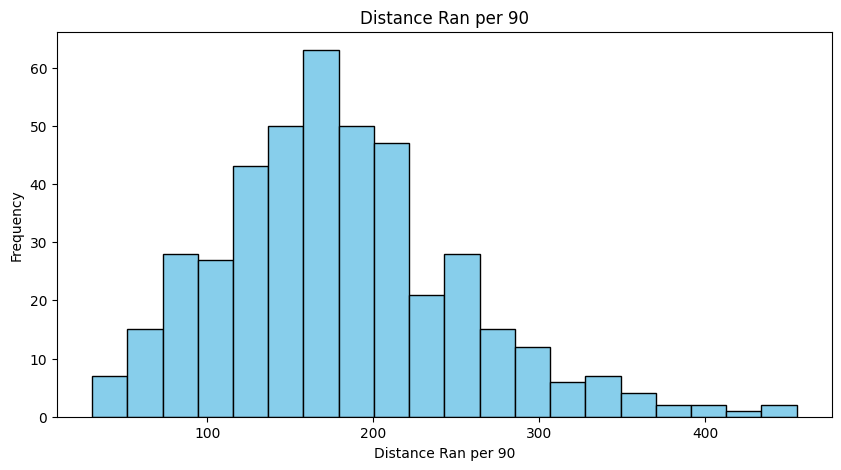

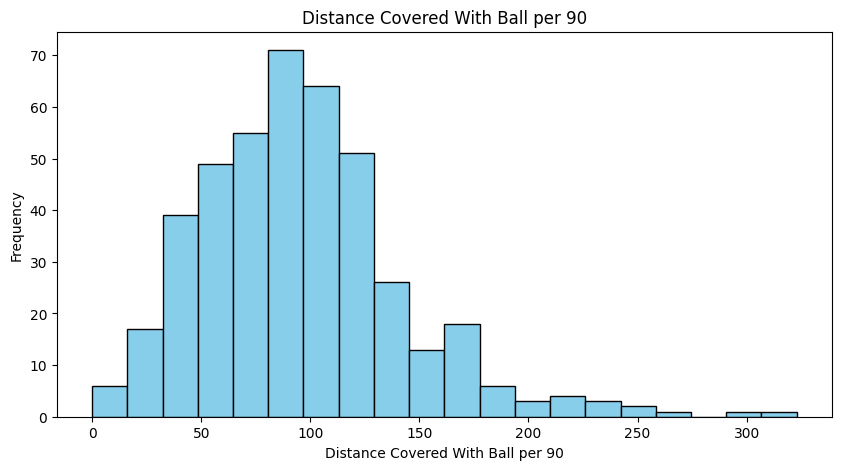

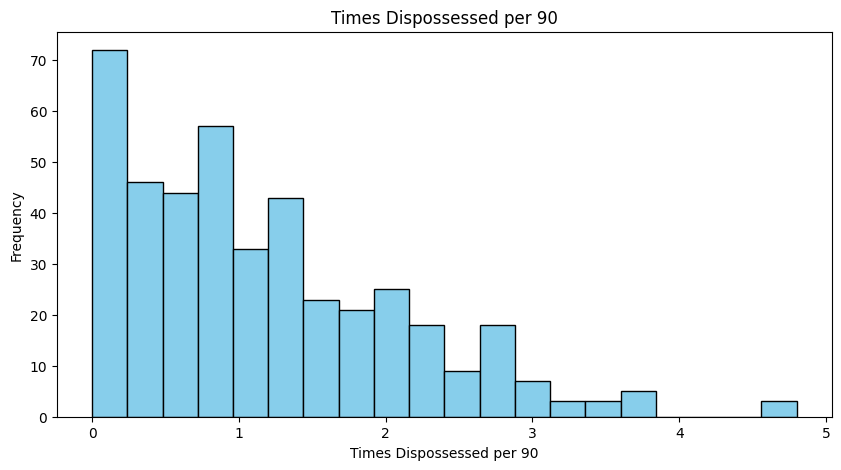

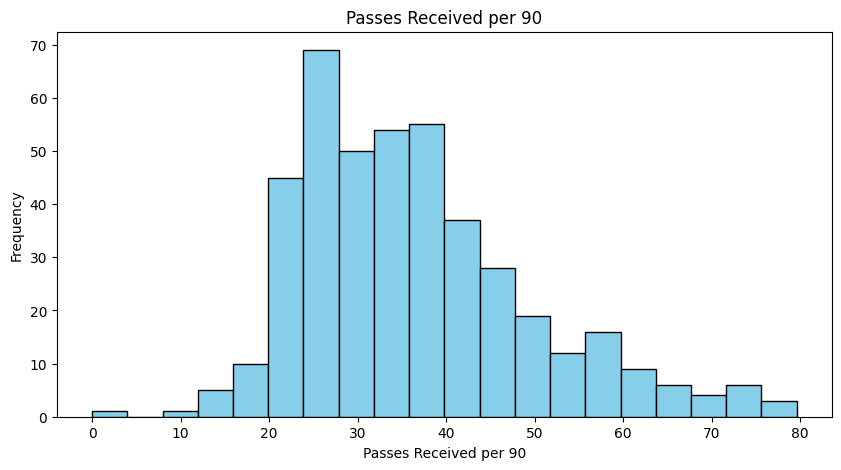

In [10]:
for column in columns_to_select:
    df[column + ' per 90'] = df[column] / df['Full 90s Played']


for column in columns_to_select:
    plt.figure(figsize=(10, 5))
    plt.hist(df[column + ' per 90'].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{column} per 90')
    plt.xlabel(f'{column} per 90')
    plt.ylabel('Frequency')
    plt.show()


# Position

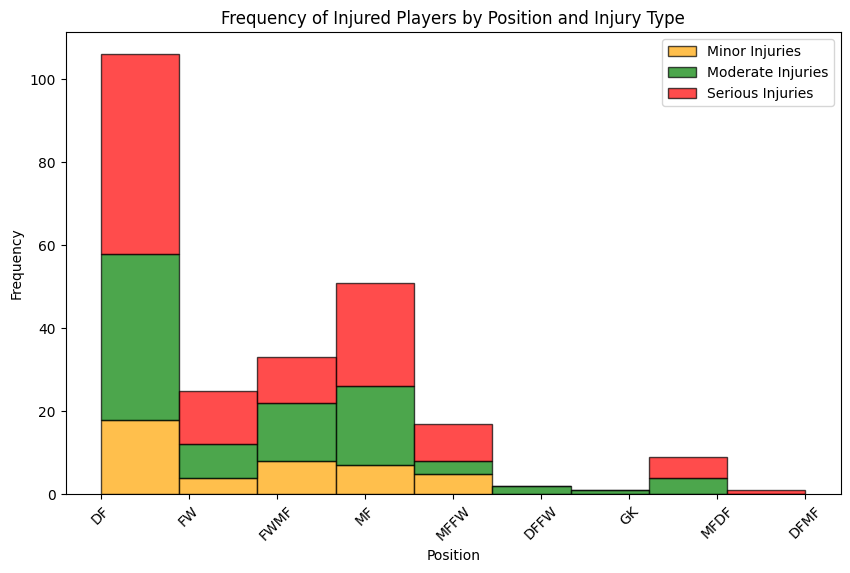

In [11]:

# Filter the dataset to include only injured players
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]


position_counts = injured_players_df['Position'].value_counts()


plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Position'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Position'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Position'][injured_players_df['Serious Injuries'] > 0]],
         bins=len(position_counts), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Position and Injury Type')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.show()


# Club Name

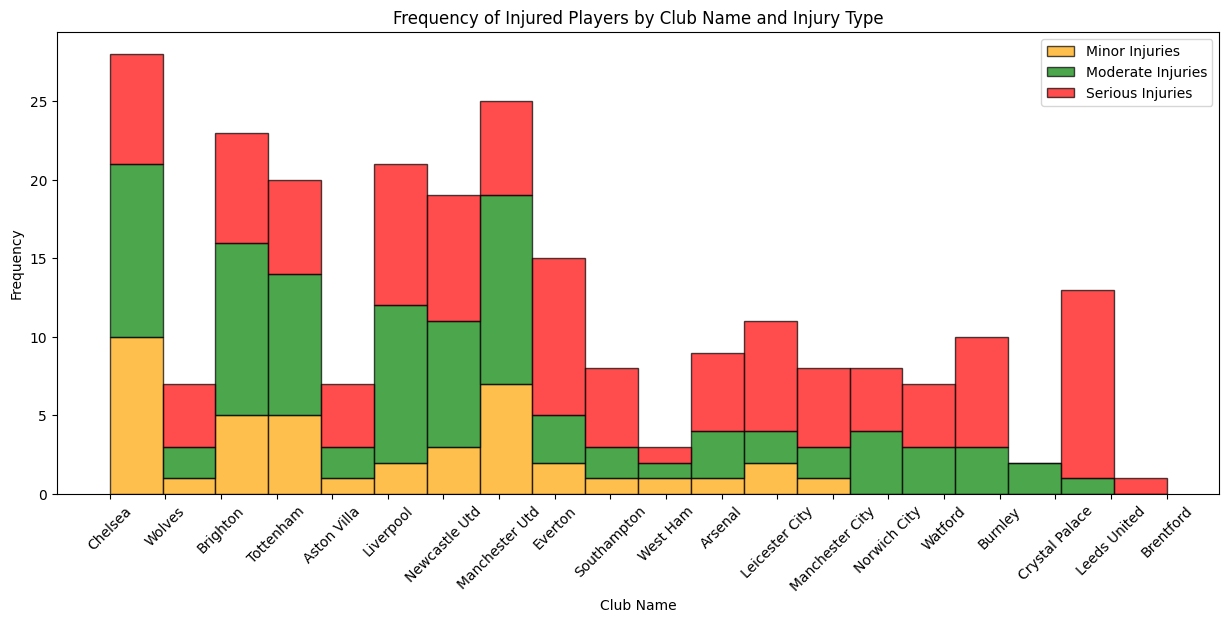

In [12]:

injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]


club_counts = injured_players_df['Club Name'].value_counts()


plt.figure(figsize=(15, 6))
plt.hist([injured_players_df['Club Name'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Club Name'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Club Name'][injured_players_df['Serious Injuries'] > 0]],
         bins=len(club_counts), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Club Name and Injury Type')
plt.xlabel('Club Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.show()


# Age

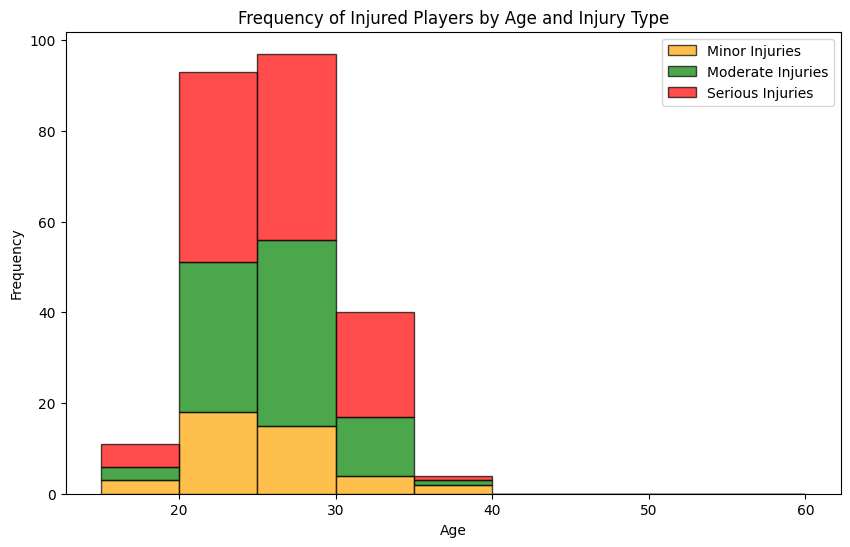

In [13]:

injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]


age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]


plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Age'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Age'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Age'][injured_players_df['Serious Injuries'] > 0]],
         bins=age_bins, color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Age and Injury Type')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

# Full 90s Played

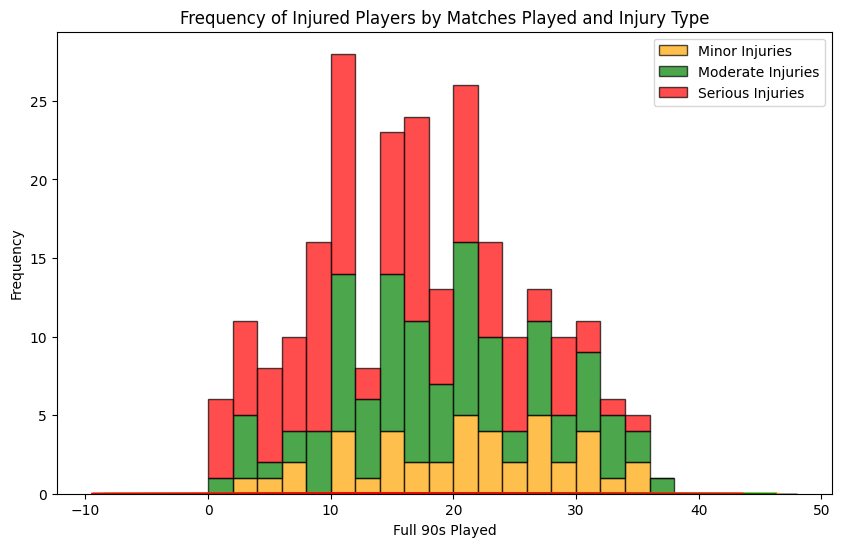

In [14]:
import seaborn as sns

# Filter data
injured_players_df = df[(df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries']) > 0]

plt.figure(figsize=(10, 6))
# Plot histogram with density line for each type of injury
plt.hist([
        injured_players_df['Full 90s Played'][injured_players_df['Minor Injuries'] > 0],
        injured_players_df['Full 90s Played'][injured_players_df['Moderate Injuries'] > 0],
        injured_players_df['Full 90s Played'][injured_players_df['Serious Injuries'] > 0]
    ],
    bins=range(0, 50, 2),
    color=['orange', 'green', 'red'],
    alpha=0.7,
    stacked=True,edgecolor='black',
    label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries']
)

# Add distribution density line for each type of injury
sns.kdeplot(injured_players_df['Full 90s Played'][injured_players_df['Minor Injuries'] > 0], color='orange')
sns.kdeplot(injured_players_df['Full 90s Played'][injured_players_df['Moderate Injuries'] > 0], color='green')
sns.kdeplot(injured_players_df['Full 90s Played'][injured_players_df['Serious Injuries'] > 0], color='red')

plt.title('Frequency of Injured Players by Matches Played and Injury Type')
plt.xlabel('Full 90s Played')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Minutes Played

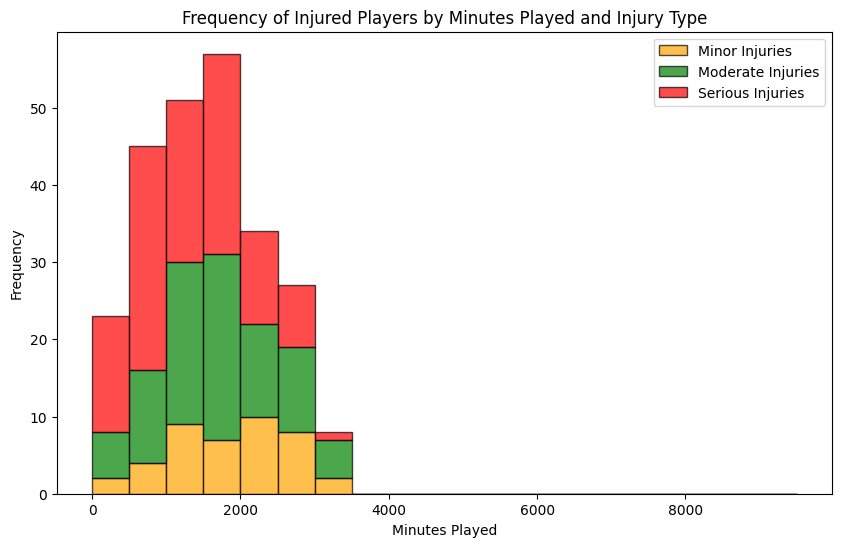

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Minutes Played'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Minutes Played'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Minutes Played'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 10000, 500), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Minutes Played and Injury Type')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Yellow Cards per 90

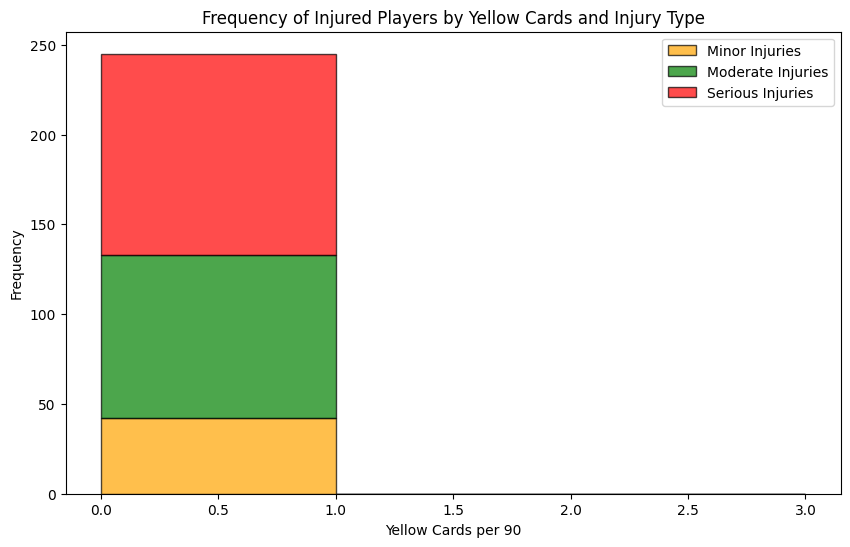

In [16]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]


plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Yellow Cards per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Yellow Cards per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Yellow Cards per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 4), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Yellow Cards and Injury Type')
plt.xlabel('Yellow Cards per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

# Red Cards  per 90'

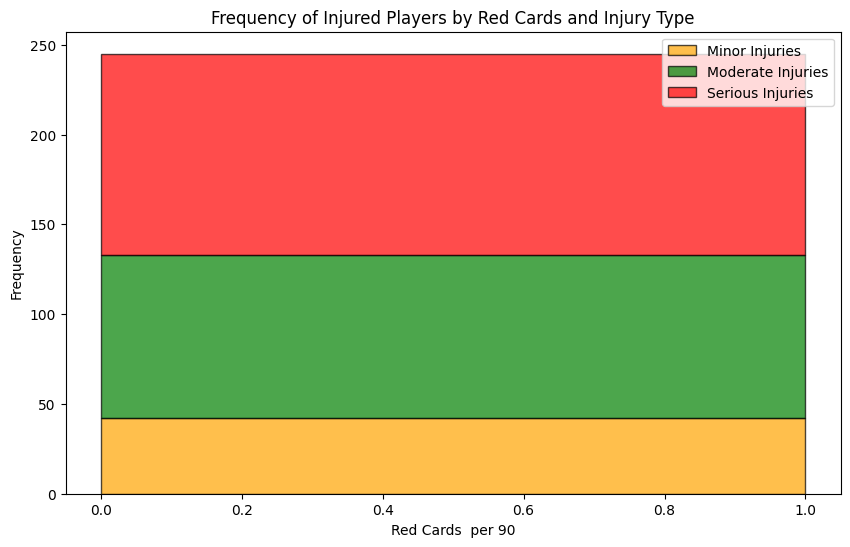

In [17]:

injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]


plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Red Cards  per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Red Cards  per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Red Cards  per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 2), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Red Cards and Injury Type')
plt.xlabel('Red Cards  per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

# Shots

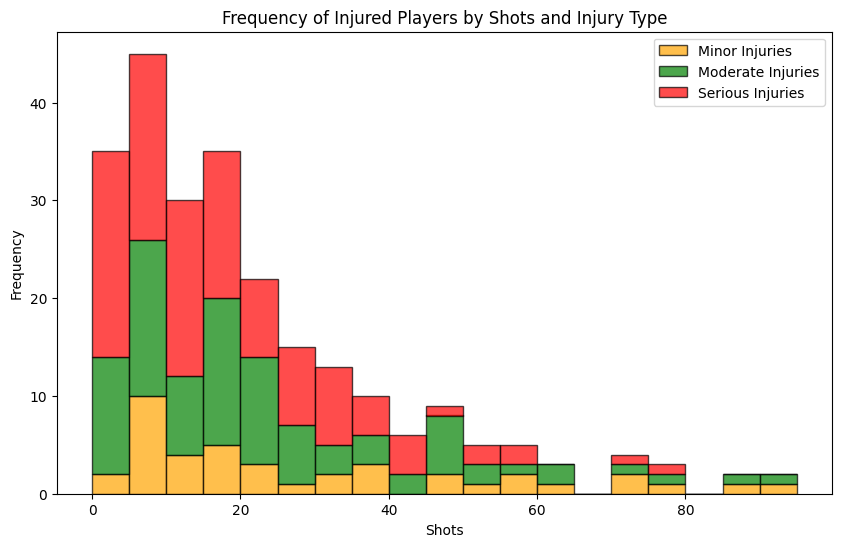

In [18]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Shots'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Shots'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Shots'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 100, 5), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Shots and Injury Type')
plt.xlabel('Shots')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Shots per 90

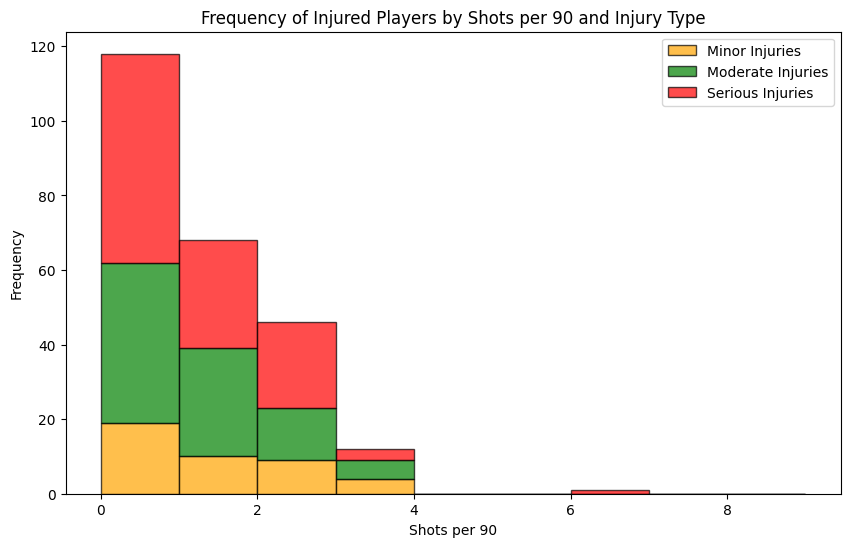

In [19]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Shots per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Shots per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Shots per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 10), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Shots per 90 and Injury Type')
plt.xlabel('Shots per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Tackles Made per 90

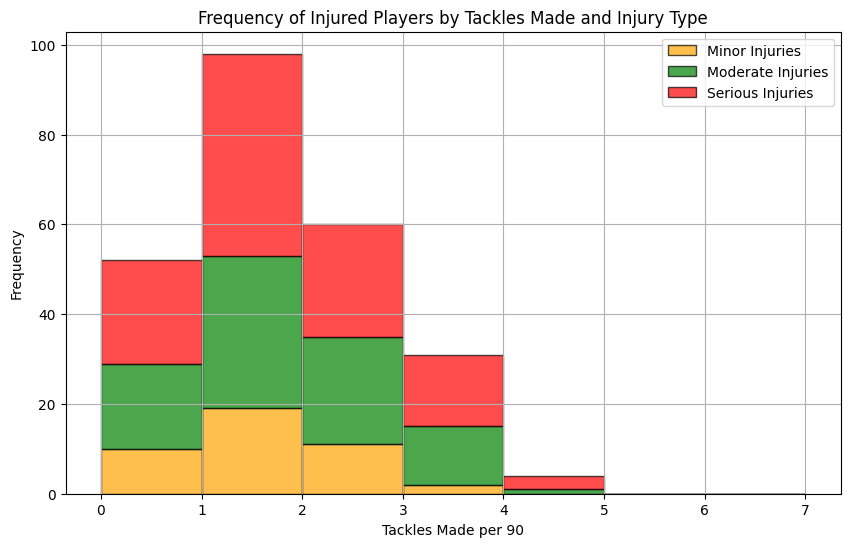

In [20]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Tackles Made per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Tackles Made per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Tackles Made per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 8, 1), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Tackles Made and Injury Type')
plt.xlabel('Tackles Made per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


# Tackles Won per 90

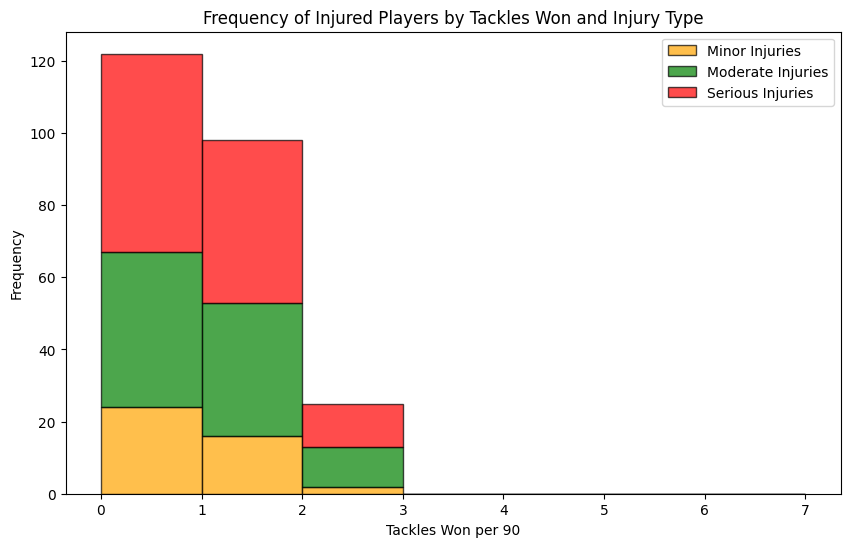

In [21]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Tackles Won per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Tackles Won per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Tackles Won per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 8, 1), color=['orange', 'green', 'red'], alpha=0.7, stacked=True, edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])


plt.title('Frequency of Injured Players by Tackles Won and Injury Type')
plt.xlabel('Tackles Won per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

# Times Team Pressed Opposition per 90

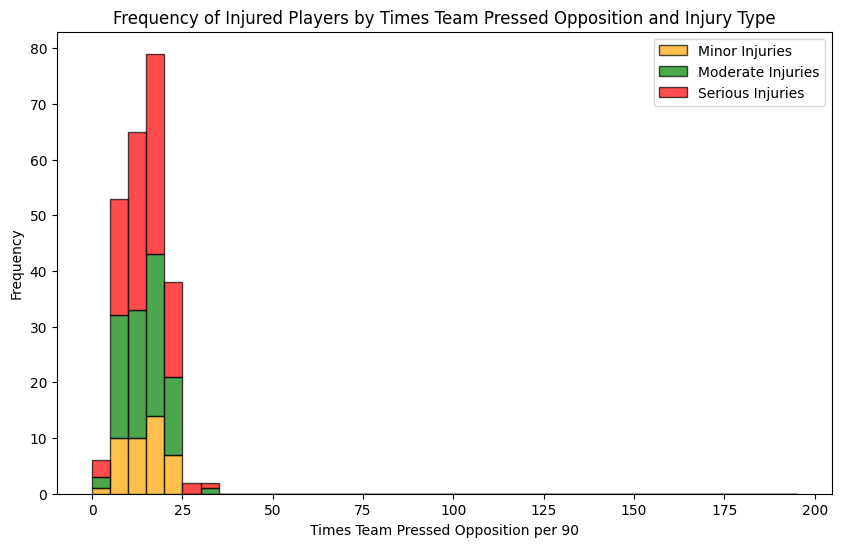

In [22]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Times Team Pressed Opposition per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Times Team Pressed Opposition per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Times Team Pressed Opposition per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 200, 5), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Times Team Pressed Opposition and Injury Type')
plt.xlabel('Times Team Pressed Opposition per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Blocks  per 90

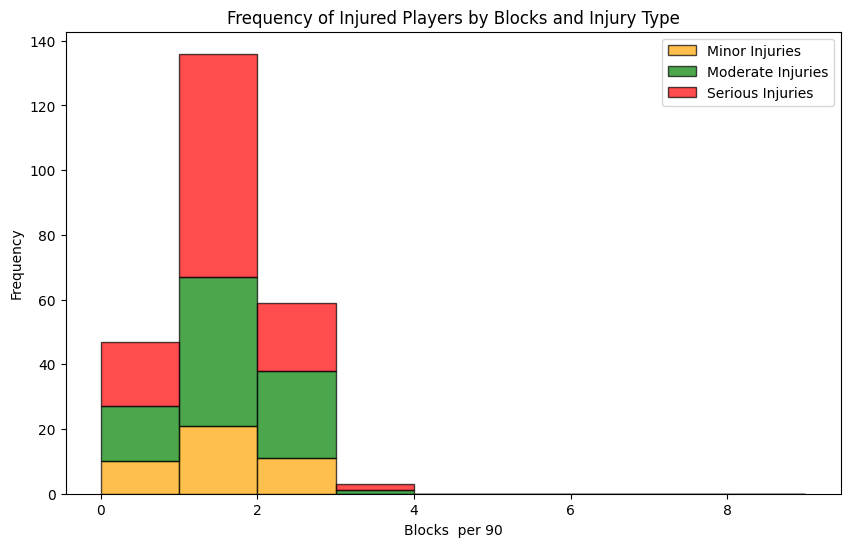

In [23]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Blocks  per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Blocks  per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Blocks  per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 10, 1), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Blocks and Injury Type')
plt.xlabel('Blocks  per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Interceptions per 90

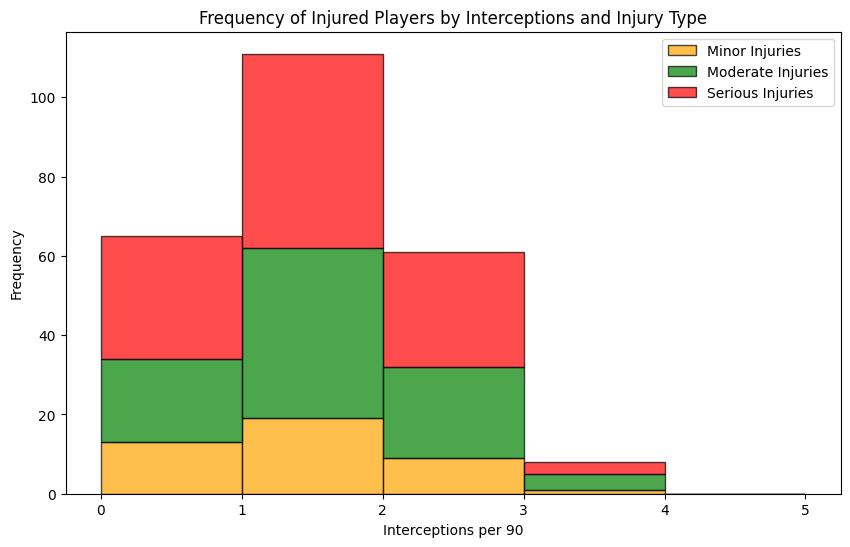

In [24]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

# Plot stacked histogram of 'Interceptions' for injured players
plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Interceptions per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Interceptions per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Interceptions per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 6, 1), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Interceptions and Injury Type')
plt.xlabel('Interceptions per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

# Clearances per 90

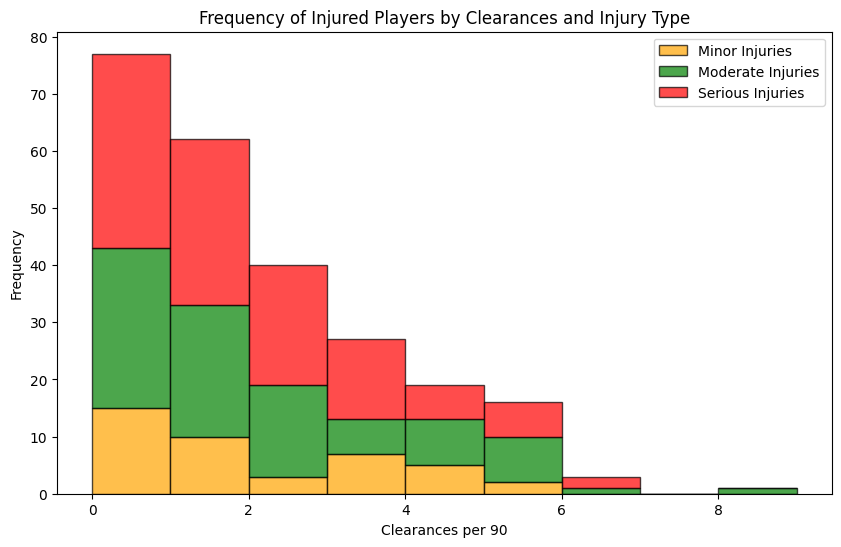

In [25]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Clearances per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Clearances per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Clearances per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 10, 1), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Clearances and Injury Type')
plt.xlabel('Clearances per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Fouls Commited per 90

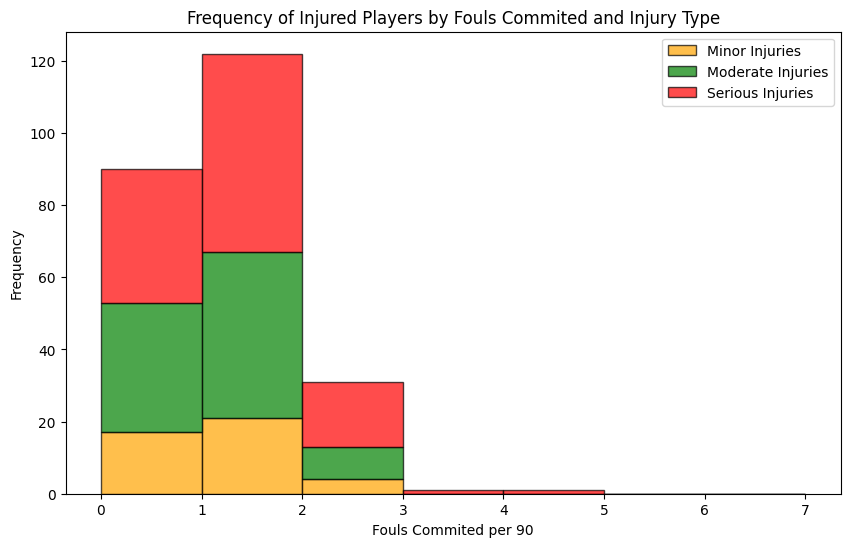

In [27]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Fouls Commited per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Fouls Commited per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Fouls Commited per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 8, 1), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Fouls Commited and Injury Type')
plt.xlabel('Fouls Commited per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Fouls Drawn per 90

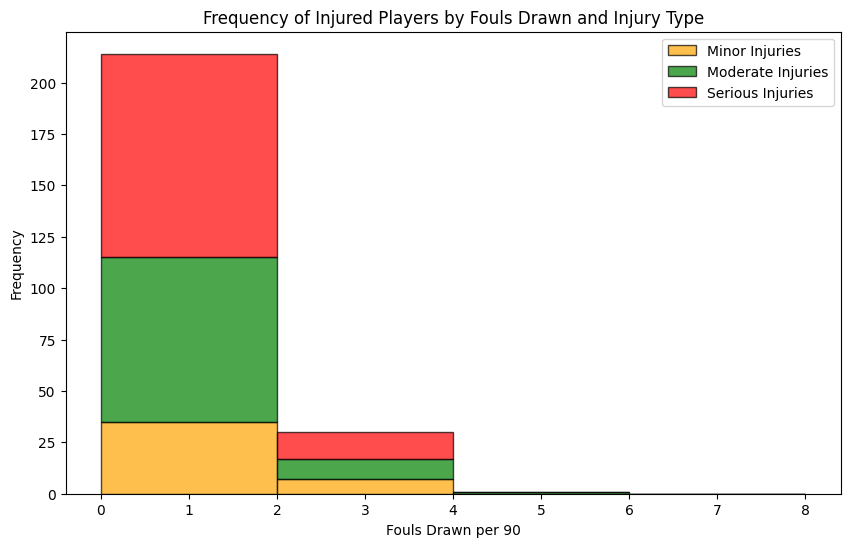

In [28]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Fouls Drawn per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Fouls Drawn per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Fouls Drawn per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 10, 2), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Fouls Drawn and Injury Type')
plt.xlabel('Fouls Drawn per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

# Loose Balls Recovered per 90

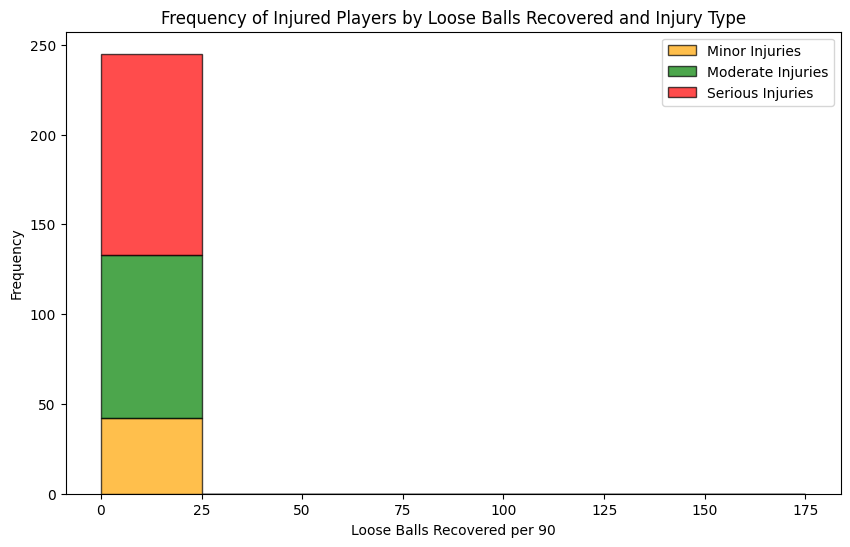

In [29]:

injured_players_df = df[df['Minor Injuries per 90'] + df['Moderate Injuries per 90'] + df['Serious Injuries per 90'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Loose Balls Recovered per 90'][injured_players_df['Minor Injuries per 90'] > 0],
          injured_players_df['Loose Balls Recovered per 90'][injured_players_df['Moderate Injuries per 90'] > 0],
          injured_players_df['Loose Balls Recovered per 90'][injured_players_df['Serious Injuries per 90'] > 0]],
         bins=range(0, 200, 25), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Loose Balls Recovered and Injury Type')
plt.xlabel('Loose Balls Recovered per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Aerial Battles Won %

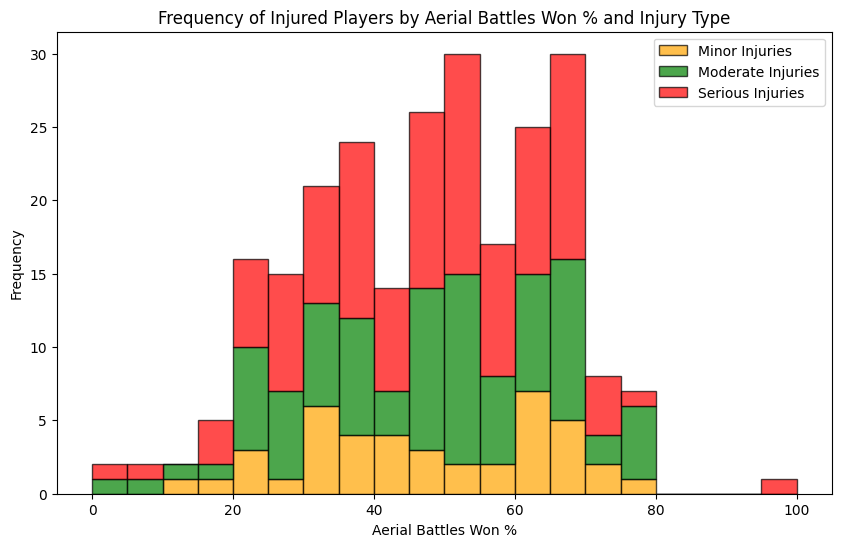

In [30]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Aerial Battles Won %'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Aerial Battles Won %'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Aerial Battles Won %'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 101, 5), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Aerial Battles Won % and Injury Type')
plt.xlabel('Aerial Battles Won %')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

# Goal Creation per 90

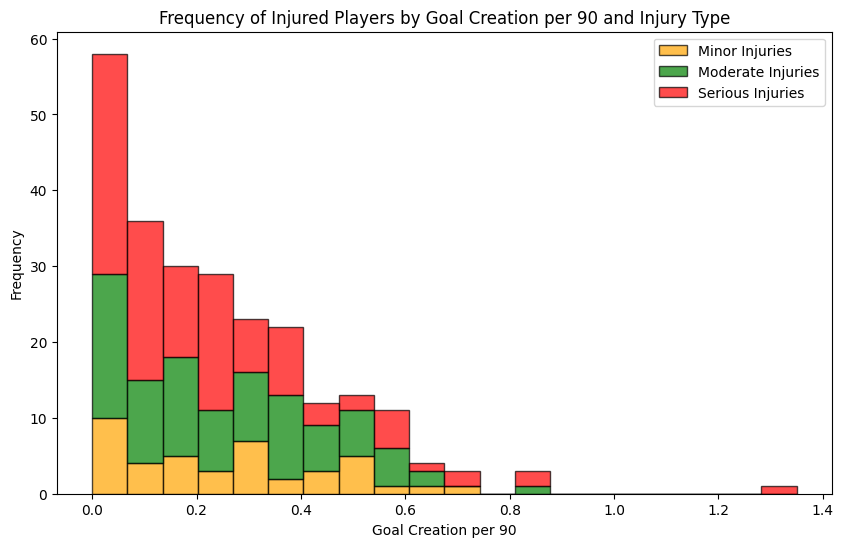

In [31]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

# Plot stacked histogram of 'Goal Creation per 90' for injured players
plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Goal Creation per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Goal Creation per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Goal Creation per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=20, color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Goal Creation per 90 and Injury Type')
plt.xlabel('Goal Creation per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Fully Completed Matches

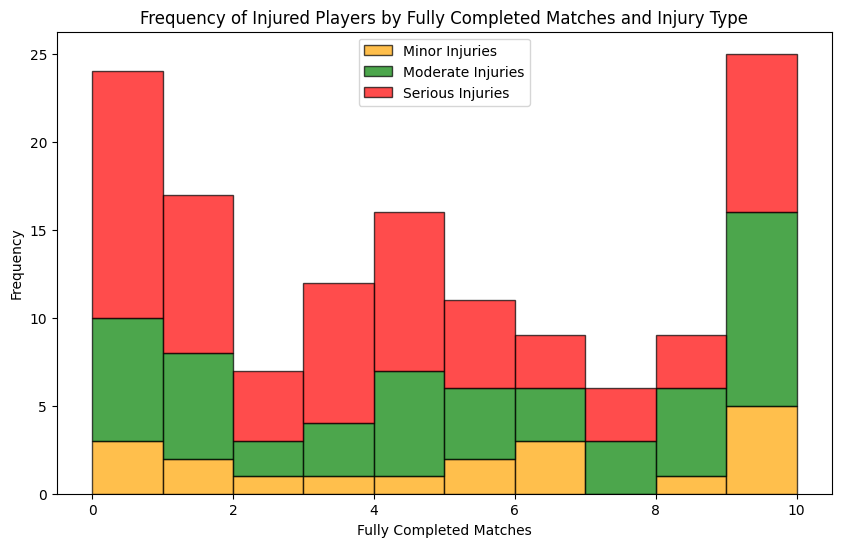

In [32]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

# Plot stacked histogram of 'Fully Completed Matches' for injured players
plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Fully Completed Matches'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Fully Completed Matches'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Fully Completed Matches'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 11), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Fully Completed Matches and Injury Type')
plt.xlabel('Fully Completed Matches')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Touches per 90

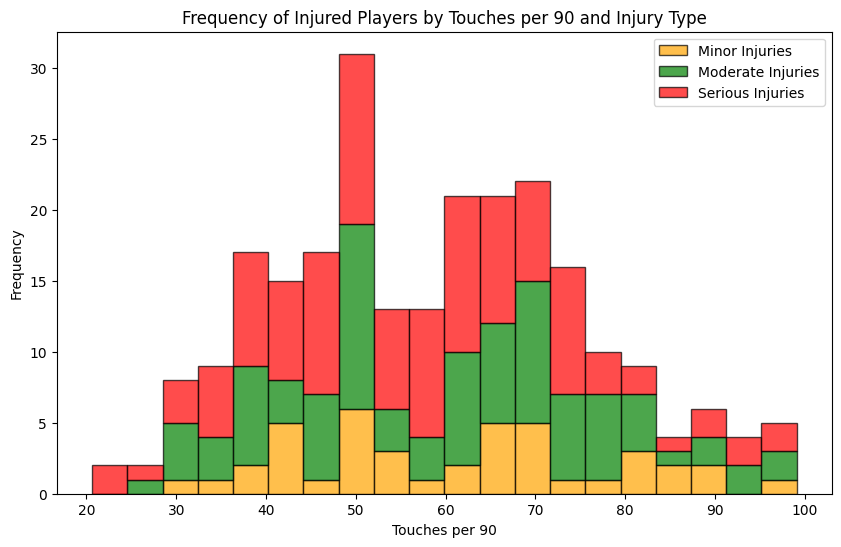

In [33]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Touches per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Touches per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Touches per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=20, color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Touches per 90 and Injury Type')
plt.xlabel('Touches per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Successful Dribbles per 90

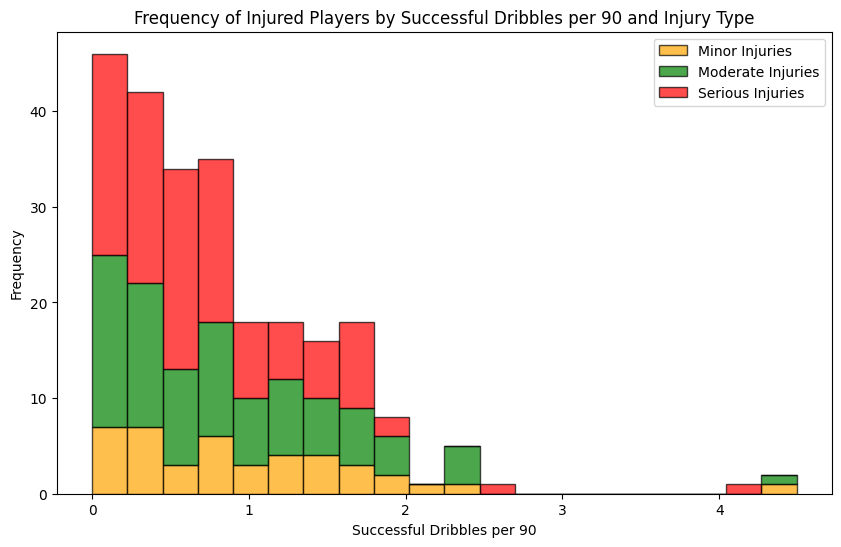

In [34]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Successful Dribbles per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Successful Dribbles per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Successful Dribbles per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=20, color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Successful Dribbles per 90 and Injury Type')
plt.xlabel('Successful Dribbles per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Attempted Dribbles per 90

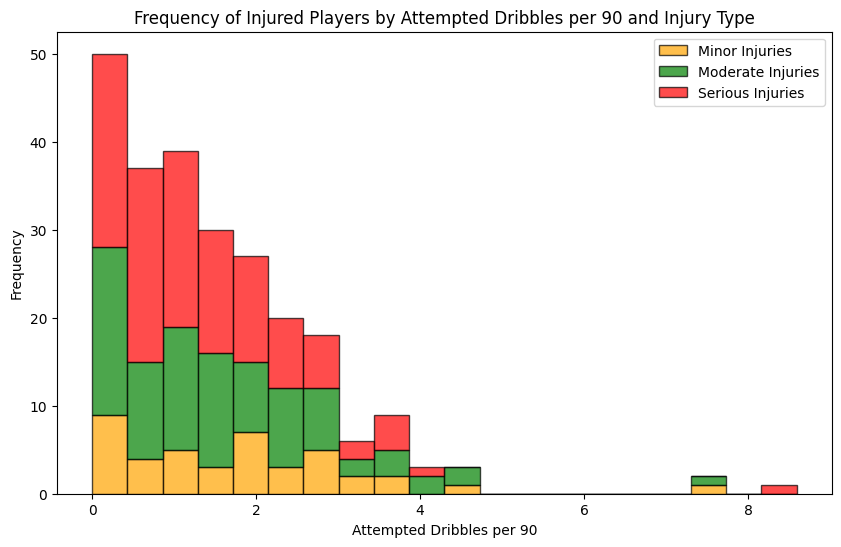

In [35]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Attempted Dribbles per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Attempted Dribbles per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Attempted Dribbles per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=20, color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Attempted Dribbles per 90 and Injury Type')
plt.xlabel('Attempted Dribbles per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Distance Ran per 90

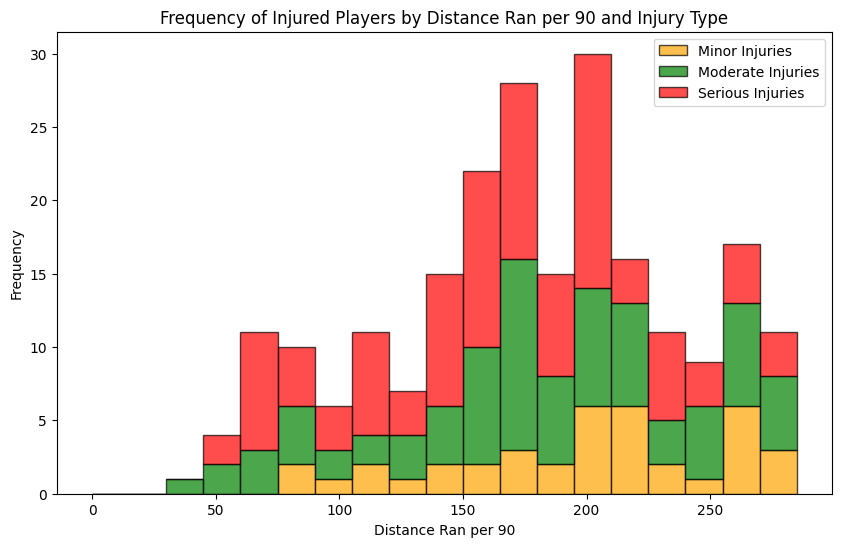

In [37]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Distance Ran per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Distance Ran per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Distance Ran per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=range(0, 300, 15), color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Distance Ran per 90 and Injury Type')
plt.xlabel('Distance Ran per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Distance Covered With Ball per 90

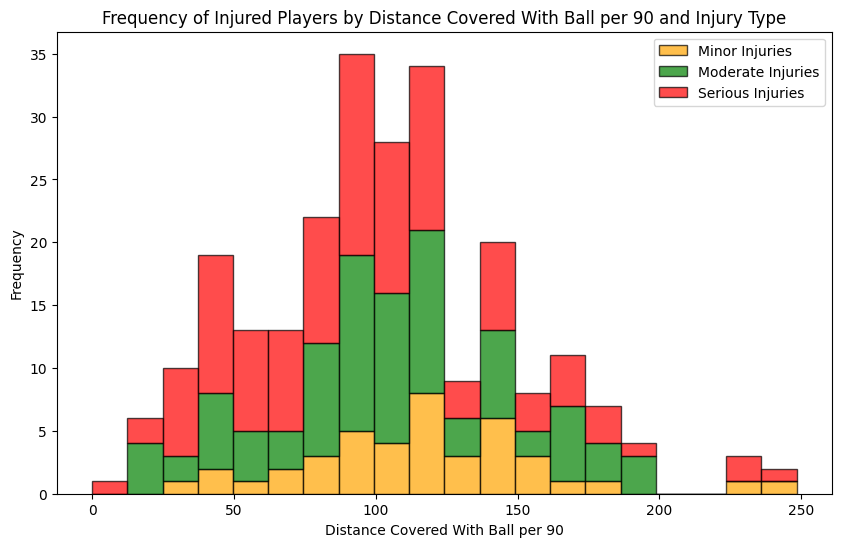

In [38]:
injured_players_df = df[df['Minor Injuries'] + df['Moderate Injuries'] + df['Serious Injuries'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Distance Covered With Ball per 90'][injured_players_df['Minor Injuries'] > 0],
          injured_players_df['Distance Covered With Ball per 90'][injured_players_df['Moderate Injuries'] > 0],
          injured_players_df['Distance Covered With Ball per 90'][injured_players_df['Serious Injuries'] > 0]],
         bins=20, color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Distance Covered With Ball per 90 and Injury Type')
plt.xlabel('Distance Covered With Ball per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Times Dispossessed per 90

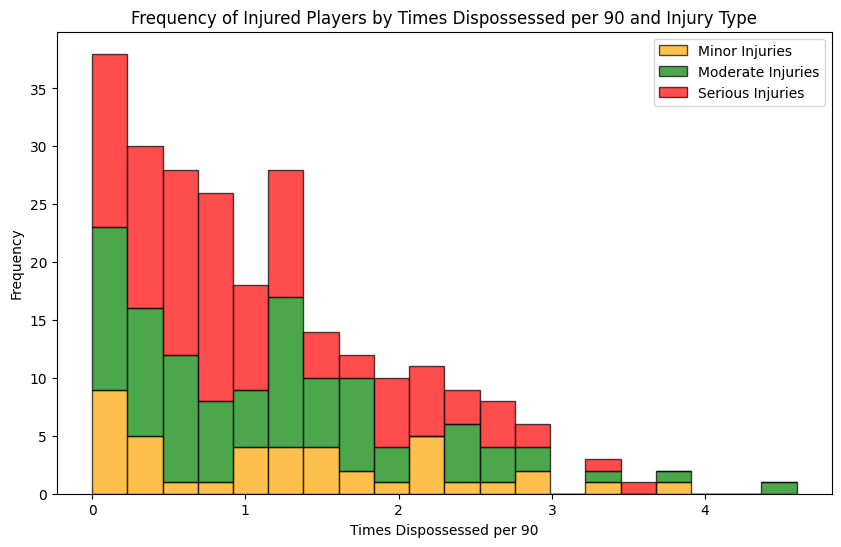

In [39]:
injured_players_df = df[df['Minor Injuries per 90'] + df['Moderate Injuries per 90'] + df['Serious Injuries per 90'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Times Dispossessed per 90'][injured_players_df['Minor Injuries per 90'] > 0],
          injured_players_df['Times Dispossessed per 90'][injured_players_df['Moderate Injuries per 90'] > 0],
          injured_players_df['Times Dispossessed per 90'][injured_players_df['Serious Injuries per 90'] > 0]],
         bins=20, color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Times Dispossessed per 90 and Injury Type')
plt.xlabel('Times Dispossessed per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# Passes Received per 90

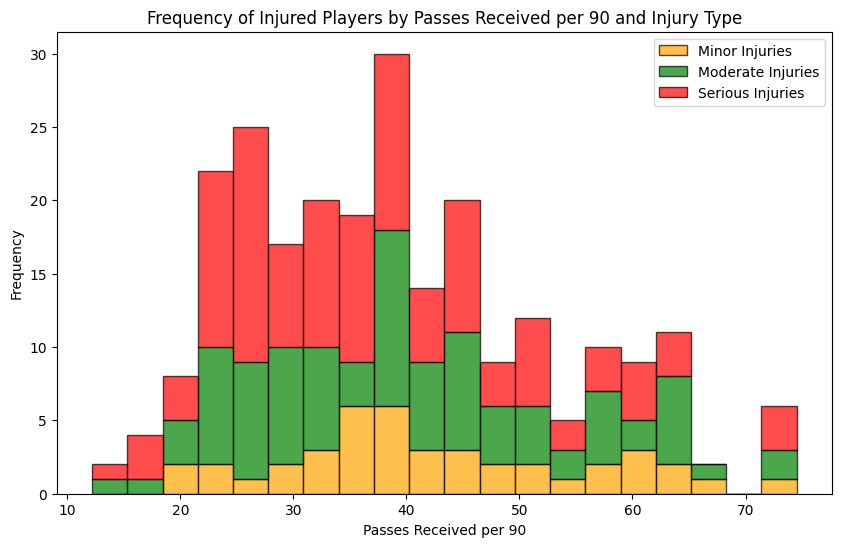

In [40]:
injured_players_df = df[df['Minor Injuries per 90'] + df['Moderate Injuries per 90'] + df['Serious Injuries per 90'] > 0]

plt.figure(figsize=(10, 6))
plt.hist([injured_players_df['Passes Received per 90'][injured_players_df['Minor Injuries per 90'] > 0],
          injured_players_df['Passes Received per 90'][injured_players_df['Moderate Injuries per 90'] > 0],
          injured_players_df['Passes Received per 90'][injured_players_df['Serious Injuries per 90'] > 0]],
         bins=20, color=['orange', 'green', 'red'], alpha=0.7, stacked=True,edgecolor='black',
         label=['Minor Injuries', 'Moderate Injuries', 'Serious Injuries'])

plt.title('Frequency of Injured Players by Passes Received per 90 and Injury Type')
plt.xlabel('Passes Received per 90')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()


# **Coorelatioon Heatmap**

In [41]:
selected_columns_for_CA = ['Full 90s Played', 'Yellow Cards per 90', 'Red Cards  per 90',
       'Tackles Made per 90', 'Tackles Won per 90',
       'Times Team Pressed Opposition per 90', 'Blocks  per 90',
       'Interceptions per 90', 'Clearances per 90', 'Fouls Commited per 90',
       'Fouls Drawn per 90', 'Loose Balls Recovered per 90', 'Touches per 90',
       'Successful Dribbles per 90', 'Attempted Dribbles per 90',
       'Distance Ran per 90', 'Distance Covered With Ball per 90',
       'Times Dispossessed per 90', 'Passes Received per 90',
       'Total Injuries per 90', 'Minor Injuries per 90',
       'Moderate Injuries per 90', 'Serious Injuries per 90',
       'COVID-19 per 90']

In [42]:
df_selected_dataframe = df[selected_columns_for_CA]

In [43]:
correlation_matrix = df_selected_dataframe.corr()

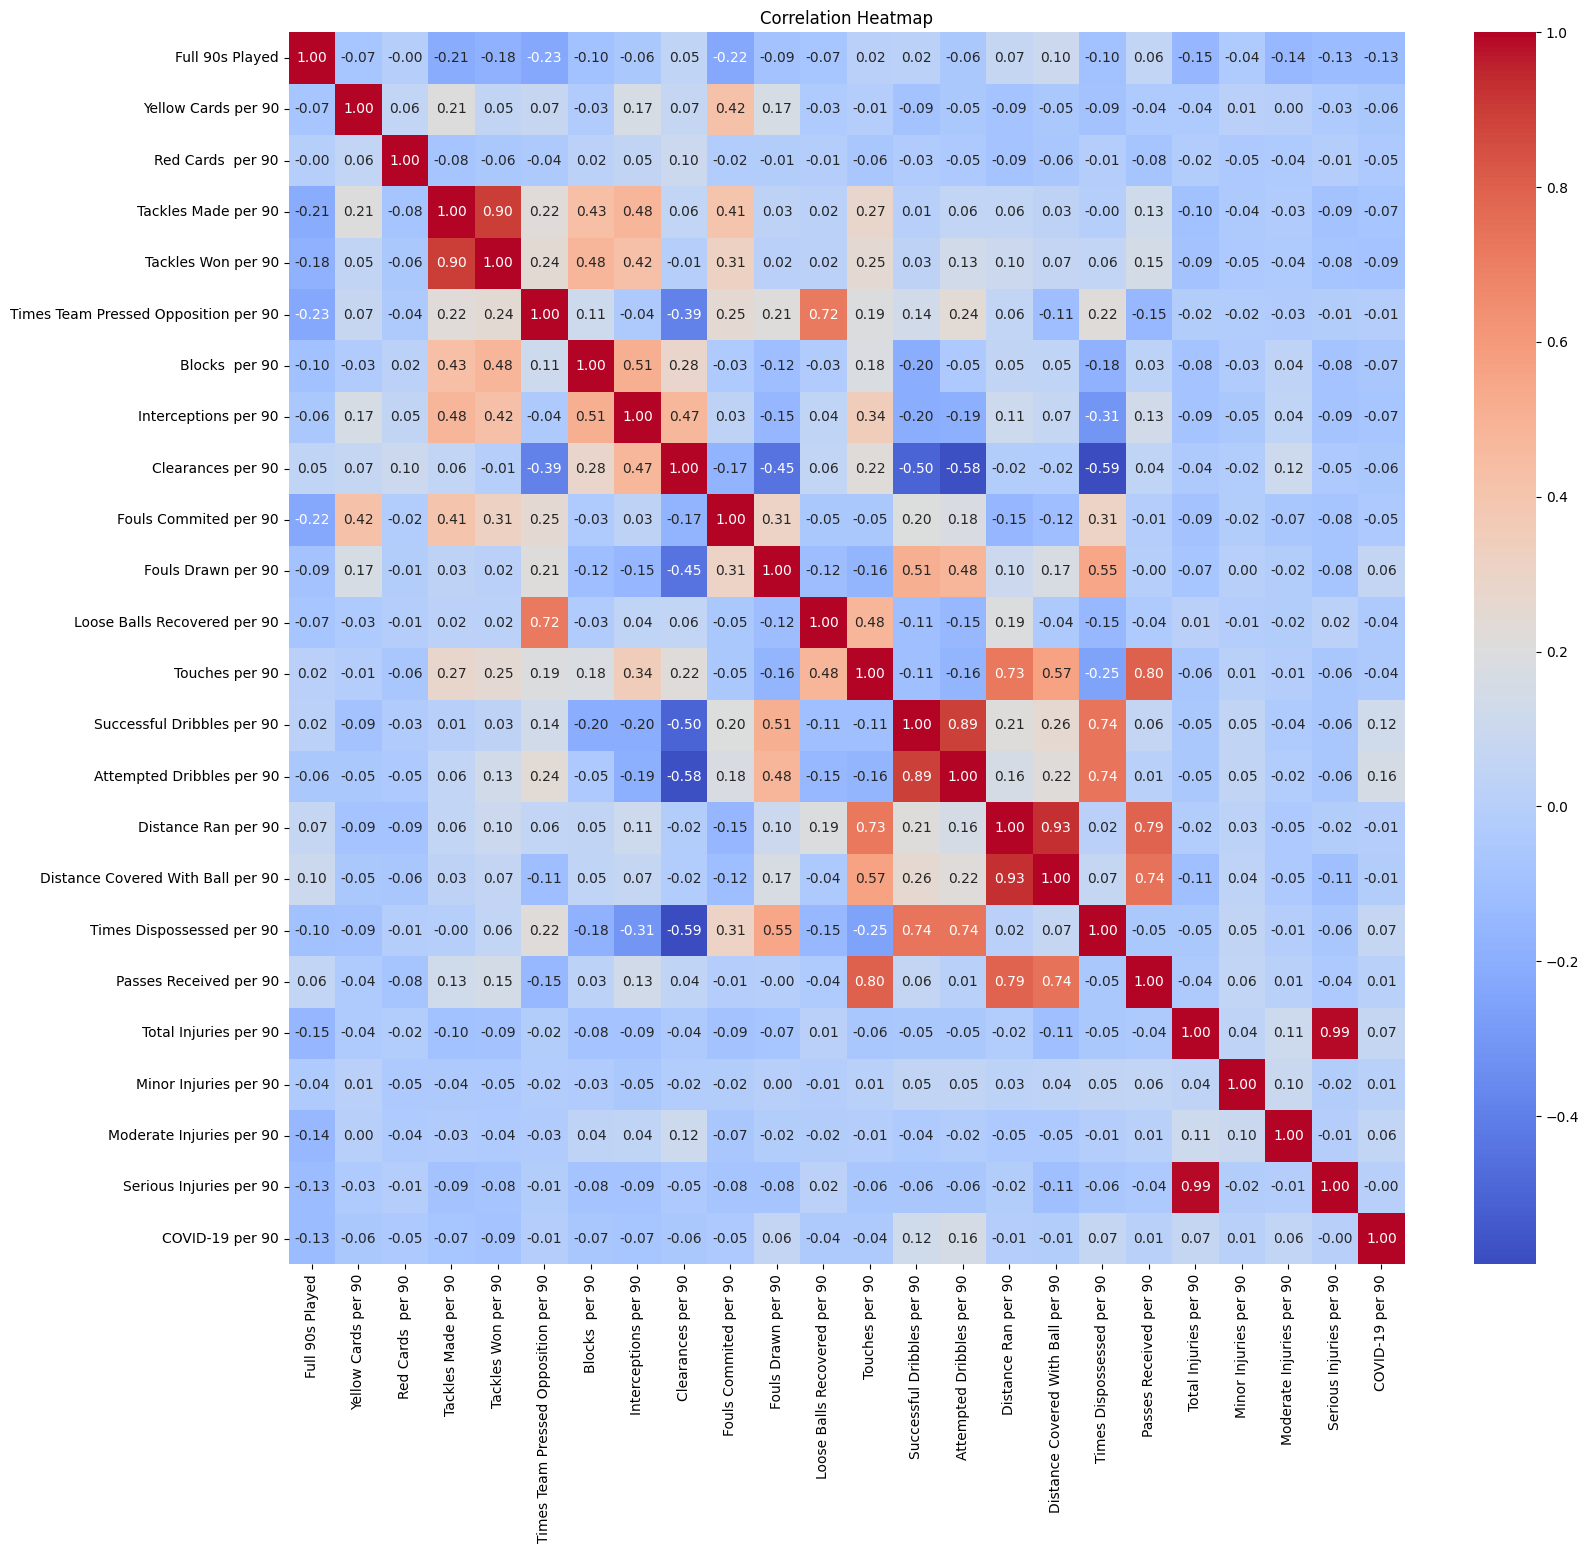

In [44]:
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **Coorelation**

In [45]:
selected_columns = ['Full 90s Played', 'Yellow Cards per 90', 'Red Cards  per 90',
       'Tackles Made per 90', 'Tackles Won per 90',
       'Times Team Pressed Opposition per 90', 'Blocks  per 90',
       'Interceptions per 90', 'Clearances per 90', 'Fouls Commited per 90',
       'Fouls Drawn per 90', 'Loose Balls Recovered per 90', 'Touches per 90',
       'Successful Dribbles per 90', 'Attempted Dribbles per 90',
       'Distance Ran per 90', 'Distance Covered With Ball per 90',
       'Times Dispossessed per 90', 'Passes Received per 90',
       'Total Injuries per 90', 'Minor Injuries per 90',
       'Moderate Injuries per 90', 'Serious Injuries per 90',
       'COVID-19 per 90']

df_selected = df[selected_columns]

# Calculate the correlation matrix for total injuries
correlation_total_injuries = df_selected.corr()['Total Injuries per 90'].sort_values(ascending=False)

# Calculate the correlation matrix for major injuries
correlation_major_injuries = df_selected.corr()['Serious Injuries per 90'].sort_values(ascending=False)

# Calculate the correlation matrix for moderate injuries
correlation_moderate_injuries = df_selected.corr()['Moderate Injuries per 90'].sort_values(ascending=False)

# Calculate the correlation matrix for minor injuries
correlation_minor_injuries = df_selected.corr()['Minor Injuries per 90'].sort_values(ascending=False)

# Calculate the correlation matrix for COVID-19 injuries
correlation_covid_injuries = df_selected.corr()['COVID-19 per 90'].sort_values(ascending=False)

In [46]:
print("Correlation with Total Injuries per 90:")
print(correlation_total_injuries)

Correlation with Total Injuries per 90:
Total Injuries per 90                   1.000000
Serious Injuries per 90                 0.989464
Moderate Injuries per 90                0.112888
COVID-19 per 90                         0.067733
Minor Injuries per 90                   0.040430
Loose Balls Recovered per 90            0.014904
Times Team Pressed Opposition per 90   -0.018964
Red Cards  per 90                      -0.019816
Distance Ran per 90                    -0.021380
Yellow Cards per 90                    -0.036922
Clearances per 90                      -0.040241
Passes Received per 90                 -0.040593
Times Dispossessed per 90              -0.052870
Attempted Dribbles per 90              -0.053420
Successful Dribbles per 90             -0.053866
Touches per 90                         -0.061283
Fouls Drawn per 90                     -0.073598
Blocks  per 90                         -0.083197
Interceptions per 90                   -0.086883
Tackles Won per 90           

In [47]:
print("\nCorrelation with Major Injuries per 90:")
print(correlation_major_injuries)


Correlation with Major Injuries per 90:
Serious Injuries per 90                 1.000000
Total Injuries per 90                   0.989464
Loose Balls Recovered per 90            0.020219
COVID-19 per 90                        -0.000073
Moderate Injuries per 90               -0.009845
Red Cards  per 90                      -0.010561
Times Team Pressed Opposition per 90   -0.013904
Distance Ran per 90                    -0.016908
Minor Injuries per 90                  -0.018651
Yellow Cards per 90                    -0.034533
Passes Received per 90                 -0.044955
Clearances per 90                      -0.049506
Touches per 90                         -0.058657
Times Dispossessed per 90              -0.059035
Successful Dribbles per 90             -0.060339
Attempted Dribbles per 90              -0.062966
Fouls Drawn per 90                     -0.076332
Tackles Won per 90                     -0.078224
Fouls Commited per 90                  -0.081281
Blocks  per 90              

In [48]:
print("\nCorrelation with Moderate Injuries per 90:")
print(correlation_moderate_injuries)


Correlation with Moderate Injuries per 90:
Moderate Injuries per 90                1.000000
Clearances per 90                       0.116969
Total Injuries per 90                   0.112888
Minor Injuries per 90                   0.096245
COVID-19 per 90                         0.058793
Interceptions per 90                    0.043755
Blocks  per 90                          0.042339
Passes Received per 90                  0.006955
Yellow Cards per 90                     0.000589
Touches per 90                         -0.008787
Times Dispossessed per 90              -0.009178
Serious Injuries per 90                -0.009845
Loose Balls Recovered per 90           -0.016341
Fouls Drawn per 90                     -0.017046
Attempted Dribbles per 90              -0.024352
Tackles Made per 90                    -0.029439
Times Team Pressed Opposition per 90   -0.031008
Successful Dribbles per 90             -0.036011
Tackles Won per 90                     -0.036581
Red Cards  per 90        

In [49]:
print("\nCorrelation with Minor Injuries per 90:")
print(correlation_minor_injuries)


Correlation with Minor Injuries per 90:
Minor Injuries per 90                   1.000000
Moderate Injuries per 90                0.096245
Passes Received per 90                  0.055281
Successful Dribbles per 90              0.052533
Times Dispossessed per 90               0.050090
Attempted Dribbles per 90               0.049301
Distance Covered With Ball per 90       0.041007
Total Injuries per 90                   0.040430
Distance Ran per 90                     0.029751
Yellow Cards per 90                     0.014442
Touches per 90                          0.008533
COVID-19 per 90                         0.006247
Fouls Drawn per 90                      0.001869
Loose Balls Recovered per 90           -0.013171
Serious Injuries per 90                -0.018651
Fouls Commited per 90                  -0.018778
Times Team Pressed Opposition per 90   -0.020129
Clearances per 90                      -0.024275
Blocks  per 90                         -0.028363
Full 90s Played             

In [50]:
print("\nCorrelation with COVID-19 Injuries per 90:")
print(correlation_covid_injuries)


Correlation with COVID-19 Injuries per 90:
COVID-19 per 90                         1.000000
Attempted Dribbles per 90               0.155567
Successful Dribbles per 90              0.124811
Times Dispossessed per 90               0.071296
Total Injuries per 90                   0.067733
Fouls Drawn per 90                      0.064930
Moderate Injuries per 90                0.058793
Passes Received per 90                  0.009146
Minor Injuries per 90                   0.006247
Serious Injuries per 90                -0.000073
Times Team Pressed Opposition per 90   -0.011048
Distance Ran per 90                    -0.012808
Distance Covered With Ball per 90      -0.013390
Touches per 90                         -0.041541
Loose Balls Recovered per 90           -0.043525
Red Cards  per 90                      -0.046156
Fouls Commited per 90                  -0.048279
Clearances per 90                      -0.055881
Yellow Cards per 90                    -0.056549
Blocks  per 90           

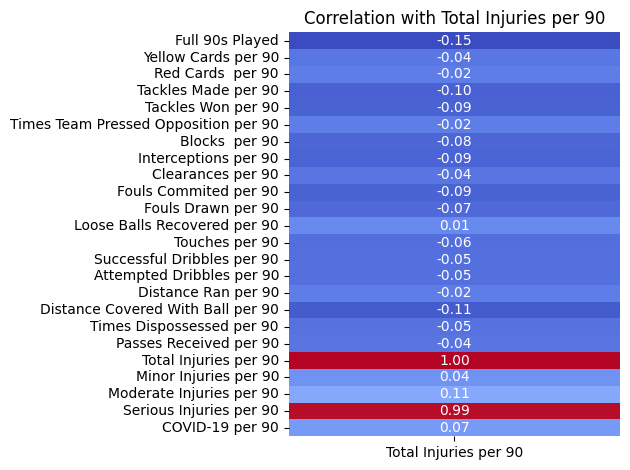

In [51]:
# Plot heatmap for total injuries

sns.heatmap(df_selected.corr()['Total Injuries per 90'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with Total Injuries per 90')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

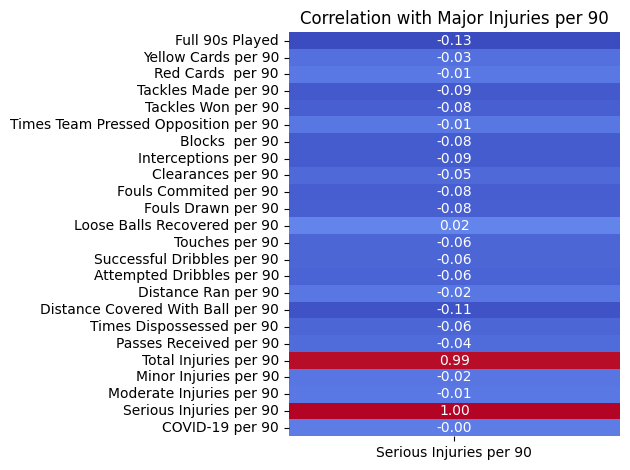

In [52]:
# Plot heatmap for major injuries

sns.heatmap(df_selected.corr()['Serious Injuries per 90'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with Major Injuries per 90')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


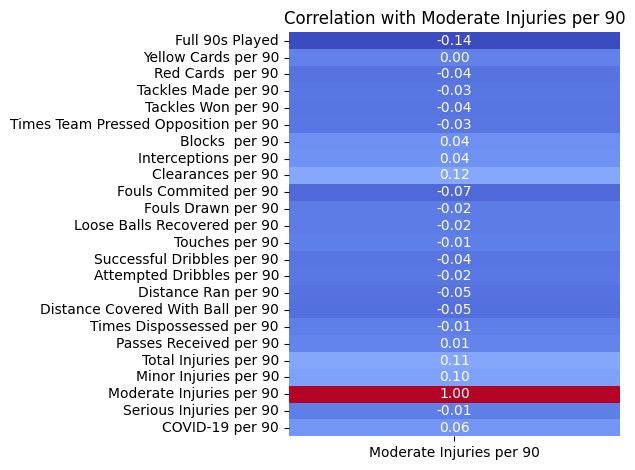

In [53]:
# Plot heatmap for moderate injuries

sns.heatmap(df_selected.corr()['Moderate Injuries per 90'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with Moderate Injuries per 90')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

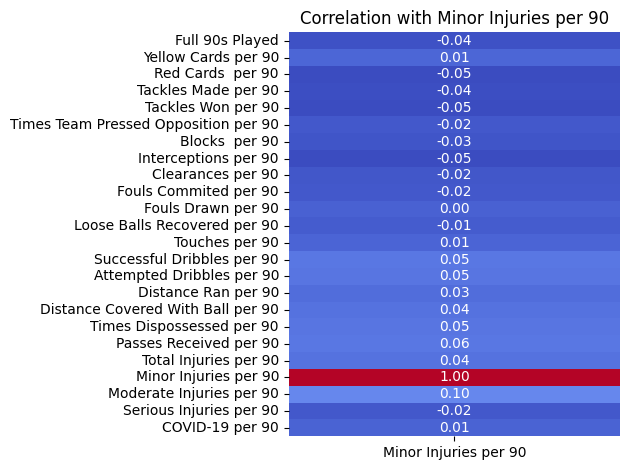

In [54]:
# Plot heatmap for minor injuries

sns.heatmap(df_selected.corr()['Minor Injuries per 90'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with Minor Injuries per 90')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

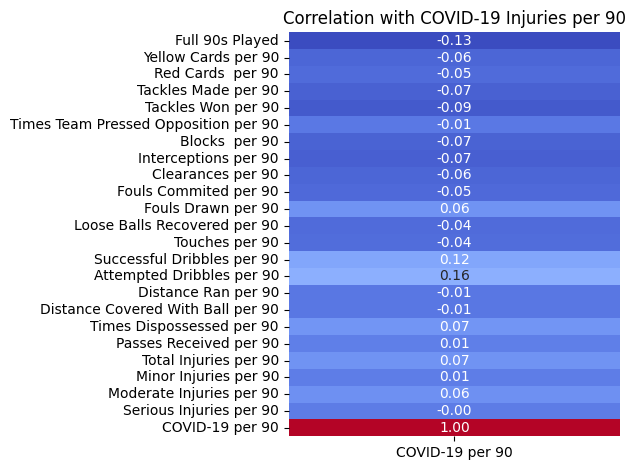

In [55]:
# Plot heatmap for COVID-19 injuries

sns.heatmap(df_selected.corr()['COVID-19 per 90'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with COVID-19 Injuries per 90')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# **PairPlot**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

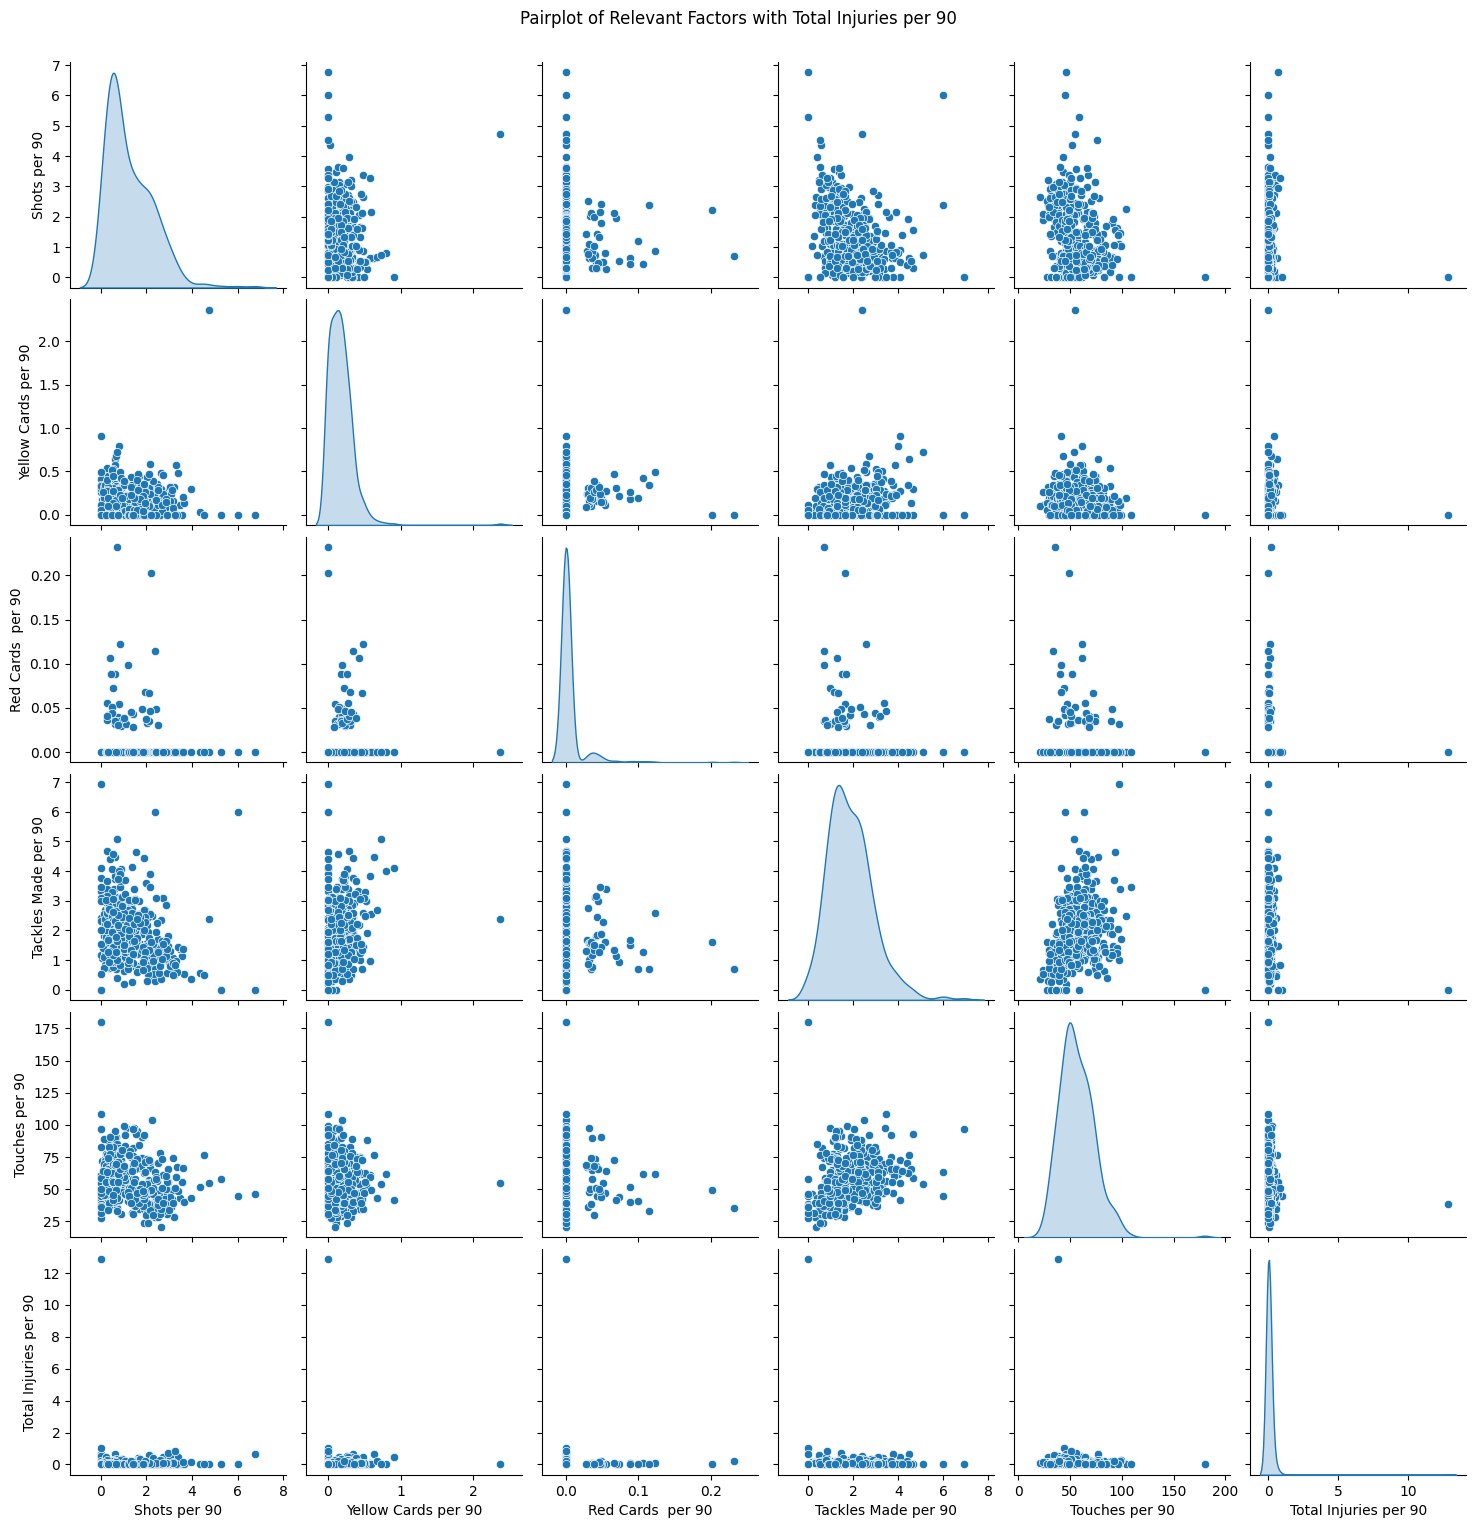

In [56]:
relevant_factors = ['Shots per 90', 'Yellow Cards per 90', 'Red Cards  per 90', 'Tackles Made per 90', 'Touches per 90']

df_relevant = df[relevant_factors + ['Total Injuries per 90']]

sns.pairplot(df_relevant, diag_kind='kde', kind='scatter', palette='husl')
plt.suptitle('Pairplot of Relevant Factors with Total Injuries per 90', y=1.02)
plt.show()


# **Prepare Data**

In [57]:
df.columns

Index(['Player Name', 'Position', 'Club Name', 'Age', ' Weekly Salary ',
       'Matches Played', 'Minutes Played', 'Yellow Cards', 'Red Cards ',
       'Shots', 'Shots per 90', 'Tackles Made', 'Tackles Won',
       'Times Team Pressed Opposition', 'Blocks ', 'Interceptions',
       'Clearances', 'Fouls Commited', 'Fouls Drawn', 'Loose Balls Recovered',
       'Aerial Battles Won %', 'Goal Creation per 90',
       'Fully Completed Matches', 'Touches', 'Successful Dribbles',
       'Attempted Dribbles', 'Distance Ran', 'Distance Covered With Ball',
       'Times Dispossessed', 'Passes Received', 'Total Injuries',
       'Minor Injuries', 'Moderate Injuries', 'Serious Injuries', 'COVID-19',
       'Full 90s Played', 'Yellow Cards per 90', 'Red Cards  per 90',
       'Tackles Made per 90', 'Tackles Won per 90',
       'Times Team Pressed Opposition per 90', 'Blocks  per 90',
       'Interceptions per 90', 'Clearances per 90', 'Fouls Commited per 90',
       'Fouls Drawn per 90', 'Loose Ba

In [58]:
drop_columns = df[['Player Name','Club Name',' Weekly Salary ', 'Matches Played', 'Minutes Played', 'Yellow Cards', 'Red Cards ',
                  'Shots','Tackles Made', 'Tackles Won','Times Team Pressed Opposition', 'Blocks ', 'Interceptions',
       'Clearances', 'Fouls Commited', 'Fouls Drawn', 'Loose Balls Recovered','Fully Completed Matches', 'Touches', 'Successful Dribbles',
       'Attempted Dribbles', 'Distance Ran', 'Distance Covered With Ball','Times Dispossessed', 'Passes Received', 'Total Injuries',
       'Minor Injuries', 'Moderate Injuries', 'Serious Injuries', 'COVID-19','Yellow Cards per 90', 'Red Cards  per 90','COVID-19 per 90','Total Injuries per 90']]

In [59]:
df = df.drop(drop_columns, axis=1)

# **Create Injury Type Column**

In [60]:
df['Injury_Type'] = 0  # Initialize all values to 0

# Assign values based on conditions for each type of injury
df.loc[df['Serious Injuries per 90'] > 0, 'Injury_Type'] = 1  # Assign 1 for Serious Injuries
df.loc[df['Moderate Injuries per 90'] > 0, 'Injury_Type'] = 2  # Assign 2 for Moderate Injuries
df.loc[df['Minor Injuries per 90'] > 0, 'Injury_Type'] = 3     # Assign 3 for Minor Injuries

# Drop the individual injury columns
df.drop(['Serious Injuries per 90', 'Moderate Injuries per 90', 'Minor Injuries per 90'], axis=1, inplace=True)


In [182]:
df.iloc[10:20]

,Position,Age,Shots per 90,Aerial Battles Won %,Goal Creation per 90,Full 90s Played,Tackles Made per 90,Tackles Won per 90,Times Team Pressed Opposition per 90,Blocks per 90,...,Loose Balls Recovered per 90,Touches per 90,Successful Dribbles per 90,Attempted Dribbles per 90,Distance Ran per 90,Distance Covered With Ball per 90,Times Dispossessed per 90,Passes Received per 90,Injury_Type,Position_Encoded
10,DF,27,0.00,71.4,0.00,2.411111,3.317972,1.244240,8.709677,2.073733,...,9.539171,46.866359,0.000000,0.829493,129.815668,58.894009,1.244240,21.981567,0,0
11,DF,22,0.22,58.3,0.00,9.277778,1.293413,0.754491,7.868263,1.077844,...,10.778443,60.574850,0.000000,0.000000,193.580838,120.718563,0.107784,34.706587,0,0
12,DF,25,0.65,65.5,0.00,29.211111,1.266641,0.718905,8.147585,2.190947,...,11.091670,61.141118,0.034234,0.068467,142.616965,68.022062,0.136934,33.514644,0,0
13,DF,31,0.00,37.5,0.00,3.744444,2.403561,1.068249,20.029674,2.937685,...,4.540059,60.890208,0.000000,0.267062,145.281899,57.685460,1.335312,34.183976,0,0
14,DF,30,0.20,54.2,0.00,10.000000,2.700000,2.200000,11.000000,2.100000,...,10.200000,64.900000,0.400000,0.500000,171.500000,83.500000,0.200000,41.200000,0,0
15,DF,19,0.70,68.4,0.00,4.311111,0.695876,0.463918,9.510309,1.623711,...,8.582474,35.721649,0.231959,0.231959,74.458763,44.304124,0.927835,16.469072,0,0
16,DF,29,0.69,76.3,0.06,16.000000,1.562500,0.750000,9.000000,2.062500,...,10.812500,48.750000,0.000000,0.062500,127.375000,49.312500,0.125000,24.000000,0,0
17,DF,29,0.62,67.2,0.00,11.355556,2.113503,1.320939,12.416830,2.465753,...,8.806262,67.896282,0.088063,0.176125,206.682975,106.555773,0.264188,43.767123,0,0
18,DF,27,0.61,61.4,0.18,11.411111,2.453749,1.314508,12.181110,2.716650,...,7.974684,56.611490,0.175268,0.613437,137.585200,69.318403,0.262902,28.130477,0,0
19,DF,27,2.26,52.1,0.45,35.855556,2.482182,1.506043,9.677719,1.255036,...,9.733499,103.582275,1.478153,2.928416,329.683917,180.111559,0.808801,75.832042,0,0


# **Encode POSITION Column**

In [61]:
# Create LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Position' column
df['Position_Encoded'] = label_encoder.fit_transform(df['Position'])

# Display the mapping of original position names to encoded values
print("Mapping of original positions to encoded values:")
for position, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{position}: {encoded_value}")


Mapping of original positions to encoded values:
DF: 0
DFFW: 1
DFMF: 2
FW: 3
FWDF: 4
FWMF: 5
GK: 6
MF: 7
MFDF: 8
MFFW: 9


In [ ]:
df.head()

,Position,Age,Shots per 90,Aerial Battles Won %,Goal Creation per 90,Full 90s Played,Tackles Made per 90,Tackles Won per 90,Times Team Pressed Opposition per 90,Blocks per 90,...,Successful Dribbles per 90,Attempted Dribbles per 90,Distance Ran per 90,Distance Covered With Ball per 90,Times Dispossessed per 90,Passes Received per 90,Minor Injuries per 90,Moderate Injuries per 90,Serious Injuries per 90,Position_Encoded
0,DF,21,0.41,22.7,0.16,32.011111,2.155502,1.155849,13.557792,2.686567,...,1.030892,2.436654,199.368275,121.614023,0.937175,32.395002,0.0,0.000000,0.000000,0
1,DF,20,0.64,51.3,0.30,20.311111,3.741794,2.117068,19.792123,1.673961,...,1.969365,3.594092,182.363239,113.238512,1.575492,35.891685,0.0,0.098468,0.000000,0
2,DF,23,0.32,62.4,0.27,22.166667,1.804511,0.992481,9.293233,1.624060,...,0.496241,0.766917,152.706767,92.345865,0.496241,24.090226,0.0,0.000000,0.045113,0
3,DF,26,0.49,83.7,0.00,10.255556,1.462622,0.487541,6.825569,1.170098,...,0.000000,0.195016,347.128927,217.053088,0.097508,70.595883,0.0,0.000000,0.000000,0
4,DF,22,1.61,45.0,0.54,31.700000,1.388013,0.757098,9.085174,1.230284,...,0.820189,1.388013,190.662461,104.574132,0.820189,59.274448,0.0,0.063091,0.031546,0


In [ ]:
df['Position_Encoded']

0      0
1      0
2      0
3      0
4      0
      ..
465    9
466    9
467    9
468    9
469    9
Name: Position_Encoded, Length: 430, dtype: int64

In [ ]:
df.columns

Index(['Position', 'Age', 'Shots per 90', 'Aerial Battles Won %',
       'Goal Creation per 90', 'Full 90s Played', 'Tackles Made per 90',
       'Tackles Won per 90', 'Times Team Pressed Opposition per 90',
       'Blocks  per 90', 'Interceptions per 90', 'Clearances per 90',
       'Fouls Commited per 90', 'Fouls Drawn per 90',
       'Loose Balls Recovered per 90', 'Touches per 90',
       'Successful Dribbles per 90', 'Attempted Dribbles per 90',
       'Distance Ran per 90', 'Distance Covered With Ball per 90',
       'Times Dispossessed per 90', 'Passes Received per 90',
       'Minor Injuries per 90', 'Moderate Injuries per 90',
       'Serious Injuries per 90', 'Position_Encoded'],
      dtype='object')

# **Model Training Step**

In [62]:
X = df.drop(columns=['Injury_Type','Position'])  # Features
y = df['Injury_Type']  # Target variable

# **Random Forest Model Without Tuning**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5581395348837209


# **Confusion Matrix**

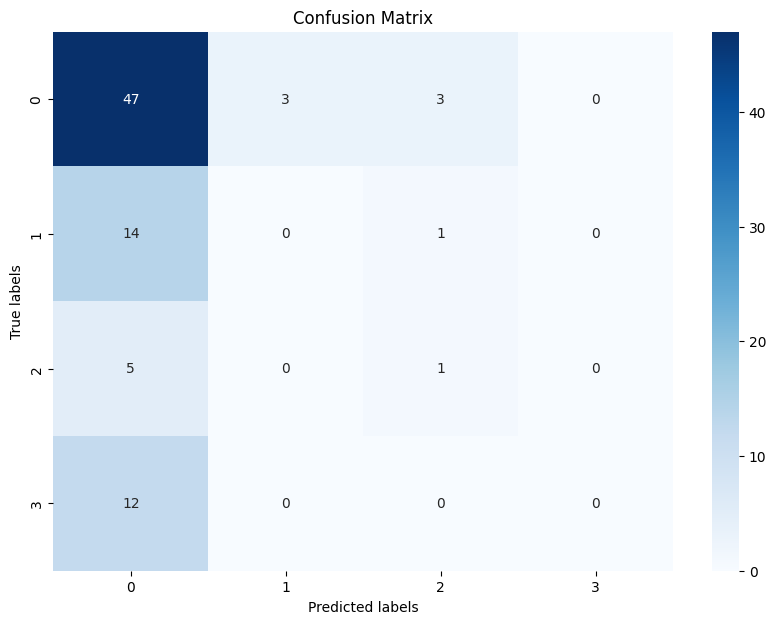

Accuracy: 0.5581395348837209
              precision    recall  f1-score   support

           0       0.60      0.89      0.72        53
           1       0.00      0.00      0.00        15
           2       0.20      0.17      0.18         6
           3       0.00      0.00      0.00        12

    accuracy                           0.56        86
   macro avg       0.20      0.26      0.22        86
weighted avg       0.39      0.56      0.45        86



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Assuming y_test are your actual labels and y_pred are the predictions from the RandomForestClassifier

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

# **RandomForest Model With Tuning**

In [67]:
# Step 1: Balance the Dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Step 2: Split the Balanced Dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Step 3: Apply Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Step 4: Evaluate the Model
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8052631578947368


# **Prediction for NEW INPUT**

In [ ]:
# (['Age', 'Shots per 90', 'Aerial Battles Won %', 'Goal Creation per 90',
#        'Full 90s Played', 'Tackles Made per 90', 'Tackles Won per 90',
#        'Times Team Pressed Opposition per 90', 'Blocks  per 90',
#        'Interceptions per 90', 'Clearances per 90', 'Fouls Commited per 90',
#        'Fouls Drawn per 90', 'Loose Balls Recovered per 90', 'Touches per 90',
#        'Successful Dribbles per 90', 'Attempted Dribbles per 90',
#        'Distance Ran per 90', 'Distance Covered With Ball per 90',
#        'Times Dispossessed per 90', 'Passes Received per 90',
#        'Position_Encoded'],
#       dtype='object')

In [ ]:
new_input_data_1 = [['20','0.64','51.3',	'0.30',	'20.311111',	'3.741794',	'	2.117068',	'19.792123',	'1.673961',	'1.870897	', '1.575492',	'0.984683',	'1.132385',	'6.646608',	'63.068928',	'1.969365',	'3.594092',	'182.363239',	'113.238512',	'1.575492',	'35.891685'	, '0']]
new_input_prediction = rf_classifier.predict(new_input_data_1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
new_input_data_df = pd.DataFrame(new_input_data)
if set(feature_names) != set(new_input_data_df.columns):
    new_input_data_df.columns = feature_names

new_input_prediction = rf_classifier.predict(new_input_data_df)


predicted_class = 1

if predicted_class == 0:
    print("No injury")
elif predicted_class == 1:
    print("Serious injury")
elif predicted_class == 2:
    print("Moderate injury")
elif predicted_class == 3:
    print("Minor injury")
else:
    print("Invalid class label")



Serious injury
